In [1]:
using LinearAlgebra, PyPlot

# Orthogonal projection and least-squares approximation

If $A$ is a "tall" $m \times n$ matrix ($m > n$), then $Ax=b$ in general has **no solution**: it is an [overdetermined system](https://en.wikipedia.org/wiki/Overdetermined_system) of equations (more equations than unknowns $x$).   But that doesn't mean we give up!

Instead, we often want to find the **closest thing to a solution**, an **approximate solution** $\hat{x}$ that **minimizes the error** $\Vert b - Ax \Vert$ over all possible $x$.

This is called the [least-squares](https://en.wikipedia.org/wiki/Least_squares) approximation because minimizing $\Vert b - Ax \Vert$ (≥ 0) is equivalent to minimizing
$$
\Vert b - Ax \Vert^2 = (b - Ax)^T (b - Ax) = \sum_{i=1}^m [b_i - (Ax)_i]^2
$$
which is the [sum of the squares of the errors](https://en.wikipedia.org/wiki/Residual_sum_of_squares) in each component of $Ax$.

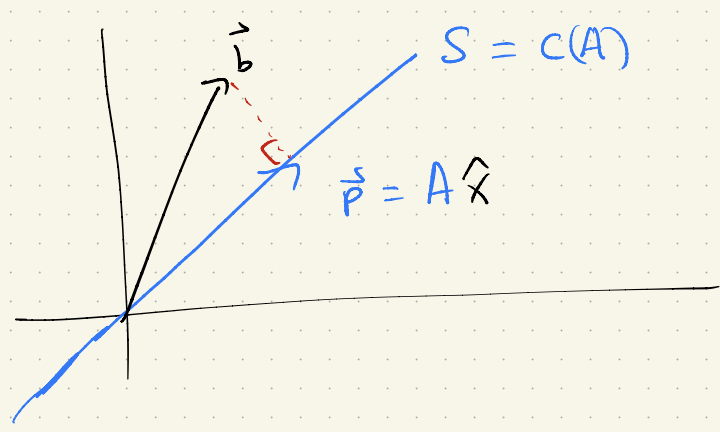

Since $Ax$ for any $x$ is *any element of C(A)*, this is equivalent to finding the **closest vector in C(A) to b**, which is exactly **orthogonal projection onto C(A)**.   That is, the least-square solution $\hat{x}$ exactly corresponds to the orthogonal projection $\boxed{p = A\hat{x} = Pb}$, which means that $\hat{x}$ solves the [normal equations](https://mathworld.wolfram.com/NormalEquation.html):
$$
A^T A \hat{x} = A^T b
$$
(which are *always* solvable).

*Common confusion*: $\hat{x}$ is *not* the orthogonal projection of $b$, it is the *coefficients* of the orthogonal projection in the basis of the columns of $A$.  The orthogonal projection $p$ is $A\hat{x}$.

### Example:

For example, here is a $3\times 2$ matrix $A$ whose column space is the plane spanned by (1,3,1) and (-1,2,4):

In [2]:
A = [1 -1
     3  2
     1  4]

3×2 Matrix{Int64}:
 1  -1
 3   2
 1   4

If we pick an arbitrary point $b$, it is unlikely to be in the column space.  e.g. consider $b = (1,2,3)$.

We can check that it's not in $C(A)$ in various ways, e.g. by doing elimination on the augmented matrix $\begin{pmatrix} A & b \end{pmatrix}$:
$$
\left(\begin{array}{r|r} A & b \end{array}\right) = \left(\begin{array}{rr|r}
\boxed{1} & -1 & 1 \\
3 & 2 & 2 \\
1 & 4 & 3
\end{array}\right) \to \left(\begin{array}{rr|r}
\boxed{1} & -1 & 1 \\
 & \boxed{5} & -1 \\
 & 5 & 2
\end{array}\right) \to \left(\begin{array}{rr|r}
\boxed{1} & -1 & 1 \\
 & \boxed{5} & -1 \\
 & 0 & {\color{red} 3}
\end{array}\right) = \left(\begin{array}{r|r} U & c \end{array}\right)
$$
Recall that since elimination $A \to U$ produced a row of zeros but $b \to c$ is nonzero in that row, then $Ux=c$ cannot be solvable: $b$ is *not* in $C(A)$.  Not surprising!  *Most* $b \in \mathbb{R}^3$ do not lie in the 2d plane $C(A)$!

But we can still solve the normal equations $A^T A \hat{x} = A^T b$:

In [3]:
A'A # AᵀA

2×2 Matrix{Int64}:
 11   9
  9  21

In [4]:
b = [1,2,3]
A'b # Aᵀb

2-element Vector{Int64}:
 10
 15

In [5]:
x̂ = (A'A) \ (A'b) #   = (A'A)⁻¹ (Aᵀb) … the "normal equations" least-squares solution

2-element Vector{Float64}:
 0.5000000000000001
 0.49999999999999994

In other words, the least-square solution is $\boxed{\hat{x} = [0.5, 0.5]}$, corresponding to the projection $p = [0, 2.5, 2.5]$:

In [6]:
p = A*x̂

3-element Vector{Float64}:
 1.6653345369377348e-16
 2.5000000000000004
 2.5

The error $\Vert b - A\hat{x}\Vert$ is as small as it can possibly get, which is not particularly small in this example:

In [7]:
norm(b - A*x̂)

1.224744871391589

### Computer tip: don't use the normal equations

It turns out that there are [better numerical algorithms](https://discourse.julialang.org/t/efficient-way-of-doing-linear-regression/31232/33?u=stevengj) to find $\hat{x}$ than to solve the normal equations.   We can get the *same* solution in Julia simpy by `x̂ = A \ b`:

In [8]:
x̂ = A \ b # = least-square solution when A is "tall" non-square!

2-element Vector{Float64}:
 0.5000000000000001
 0.49999999999999983

This trick, that `A \ b` computes $A^{-1} b$ if $A$ is square but computes the least-square solution if $A$ is non-square, was borrowed from [Matlab, which has a similar syntax](https://www.mathworks.com/help/matlab/ref/mldivide.html).

In Python, you should use [`x̂ = numpy.linalg.leastsq(A, b)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) for similar reasons.

# Fitting points to a line

The classic example of least square fitting is fitting a bunch of points to a line, also known as **least-squares [linear regression](https://en.wikipedia.org/wiki/Linear_regression)**.

The following is data on the change (°C) in [average January global temperature](https://en.wikipedia.org/wiki/Global_temperature_record) (compared to the 1901–2000 average) since 1973 (the year Prof. Johnson was born), from the [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/1/1/1973-2022):

In [9]:
year = [1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
ΔT = [0.28, -0.19, 0.11, -0.02, 0.13, 0.16, 0.15, 0.33, 0.51, 0.14, 0.53, 0.3, 0.22, 0.31, 0.32, 0.56, 0.17, 0.36, 0.43, 0.46, 0.36, 0.27, 0.56, 0.25, 0.34, 0.6, 0.51, 0.34, 0.47, 0.71, 0.72, 0.61, 0.65, 0.5, 0.92, 0.27, 0.6, 0.73, 0.46, 0.44, 0.62, 0.69, 0.83, 1.12, 0.98, 0.75, 0.94, 1.14, 0.78, 0.89];

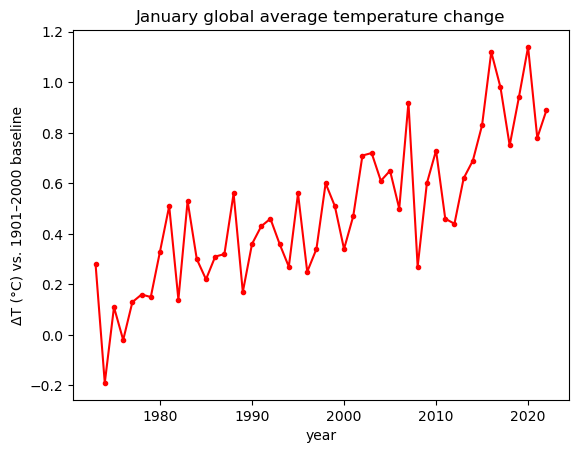

PyObject Text(0.5, 1.0, 'January global average temperature change')

In [10]:
using PyPlot
plot(year, ΔT, "r.-")
xlabel("year")
ylabel("ΔT (°C) vs. 1901–2000 baseline")
title("January global average temperature change")

We can't draw a single line that goes through all of the points, but we can try to minimize some *average* error between the fit and *all* of the points.   The most common approach is to minimize the average |error|², which is called a [least squares fit](https://en.wikipedia.org/wiki/Least_squares) or, in the particular case of fitting to a *line*, [linear regression](https://en.wikipedia.org/wiki/Linear_regression):

For example, if we want to fit to the linear model
$$
\mathrm{model}(\mathrm{year}) = \Delta T = x_1 + x_2 (\mathrm{year} - 1973)
$$
where $x_1$ is the intercept and $x_2$ is the slope, then sum of the squares of errors for $m$ data points is:
$$
\mathrm{SSE} = \sum_{k=1}^m \big[ \Delta T_k - \underbrace{\mathrm{model}(\mathrm{year}_k)}_{\mbox{row }k\mbox{ of }Ax} \big]^2
$$

### Matrix formulation

A key fact is that **this model depends linearly** on the **unknown x** parameters.  And so we can write it in terms of matrix and vector algebra.

In matrix form, we obtain:
$$
\mathrm{SSE} = \Vert b - Ax \Vert^2
$$
where
$$
A = \begin{pmatrix} 1 & \mathrm{year}_1 - 1973 \\ 1 & \mathrm{year}_2 - 1973 \\ \vdots & \vdots \\ 1 & \mathrm{year}_m - 1973 \end{pmatrix}, 
\qquad x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \qquad b = \begin{pmatrix} \Delta T_1 \\ \Delta T_2 \\ \vdots \\ \Delta T_m \end{pmatrix} \, .
$$
As we've seen in class, the minimum of $\Vert b - Ax \Vert^2$ is achieved by **orthogonal projection** of $b$ onto $C(A)$, corresponding to $\hat{x}$ solving the "normal equations"
$$
A^T A \hat{x} = A^T b
$$
or simply by `A \ b` in Julia:

In [11]:
b = ΔT
A = [year.^0 year.-1973]

50×2 Matrix{Int64}:
 1   0
 1   1
 1   2
 1   3
 1   4
 1   5
 1   6
 1   7
 1   8
 1   9
 1  10
 1  11
 1  12
 ⋮  
 1  38
 1  39
 1  40
 1  41
 1  42
 1  43
 1  44
 1  45
 1  46
 1  47
 1  48
 1  49

In [12]:
x̂ = A \ b

2-element Vector{Float64}:
 0.08468235294117643
 0.01638847539015606

In [13]:
# Alternatively, the normal equations solution:
(A'A) \ A'b

2-element Vector{Float64}:
 0.08468235294117665
 0.01638847539015606

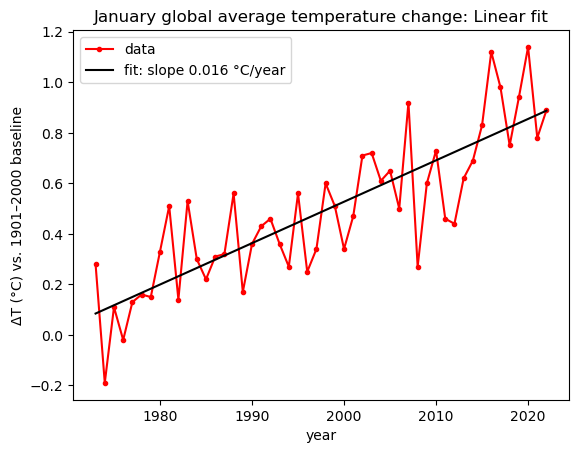

PyObject <matplotlib.legend.Legend object at 0x14134f790>

In [14]:
using PyPlot
plot(year, ΔT, "r.-")
xlabel("year")
ylabel("ΔT (°C) vs. 1901–2000 baseline")
title("January global average temperature change: Linear fit")

plot(year, A * x̂, "k-")
legend(["data", "fit: slope $(round(x̂[2], sigdigits=2)) °C/year"])

It's obvious by eye that this fit line is a better description of the overall trend than any two data points.

More precisely, if the data noise is uncorrelated, then in a certain statistical sense a least-squares estimate is optimal, as described by the [Gauss–Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem).

# Fitting a nonlinear-resistance model

Least-square fitting is not limited to fitting lines — you can fit *nonlinear* functions, as long as the **unknowns are multiplicative coefficients** (i.e. the *unknowns appear "linearly" in the equations*).

[Ohm's law](https://en.wikipedia.org/wiki/Ohm%27s_law) says that voltage drop $d$ across a resistor is proportional to the current $i$ via $d = iR$, where $R$ is the [resistance](https://en.wikipedia.org/wiki/Electrical_resistance_and_conductance).  Normally, we treat $R$ as a constant (the relationship is *linear*), but in fact this is not exactly true.

A real resistance actually *changes* as you increase the voltage drop $d$.  (For example, this happens as the resistor heats up; eventually it melts!)
One simple model of a nonlinear resistance is:
$$
R = x_1 + x_2 d^2 .
$$
Here, the resistance is constant plus a "small" correction that grows as we increase $d$.  (We won't have any term proportional to $d$ if the current flows equally well in both directions, so that $R$ doesn't depend on the *sign* of $d$.)

One would normally get these coefficients $x_1$ and $x_2$ by experimental measurements.  Such "fitting" processes lead directly into the next major topic in 18.(C)06:

## Exact fits

Suppose we put two voltage differences $d_1$ and $d_2$ across our resistor, and measure two resistances $R_1$ and $R_2$.  This leads to the following $2 \times 2$ system of equations for the unknown coefficients $x_1$ and $x_2$:

$$
\begin{pmatrix} x_1 + x_2 d_1^2 \\ x_1 + x_2 d_2^2 \end{pmatrix} =
\underbrace{\begin{pmatrix} 1 & d_1^2 \\ 1 & d_2^2 \end{pmatrix}}_A
\underbrace{\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}}_x =
\underbrace{\begin{pmatrix} R_1 \\ R_2 \end{pmatrix}}_b \; ,
$$

i.e. a system $Ax = b$.   As long as $|d_1| \ne |d_2|$, the matrix $A$ is non-singular, and this has a unique solution: an **interpolating polynomial** going through the two data points:

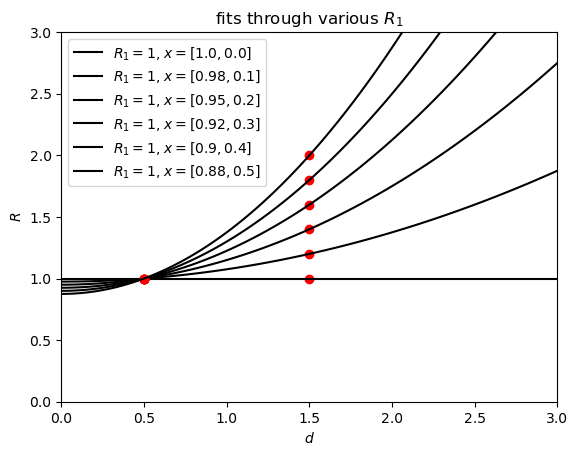

PyObject <matplotlib.legend.Legend object at 0x146d53e20>

In [15]:
let d = range(0,3,length=100), d₁=0.5, d₂=1.5, R₁=1, leg=[]
    for R₂=1:0.2:2
        x = [1 d₁^2; 1 d₂^2] \ [R₁, R₂]
        plot([d₁, d₂], [R₁, R₂], "ro", label="_nolegend_")
        plot(d, x[1] .+ x[2]*d.^2, "k-")
        xlim(0,3)
        ylim(0,3)
        push!(leg, L"$R_1 = %$R₁$, $x = %$(round.(x, digits=2))$")
        xlabel(L"d")
        ylabel(L"R")
    end
    title(L"fits through various $R_1$")
    legend(leg)
end

In general, if you have $m$ points you can interpolate them in this way by a degree $m-1$ polynomial (called the [Lagrange interpolating polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial)) in this way: you set up an $m \times m$ matrix system for the coefficients.

Note, however, that this is neither the most efficient nor the most accurate (given roundoff errors) method to compute an exact interpolating polynomial.  There is a much better method called [barycentric interpolation](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) that is outside the scope of 18.(C)06.

## Inexact fits

Suppose we do more than just the bare minimum number of measurements, however.  Suppose that we do $m > 2$ measurements.  This gives the following system of equations:



$$
\underbrace{\begin{pmatrix} 1 & d_1^2 \\ 1 & d_2^2 \\
                           \vdots & \vdots  \\ 1 & d_m^2 \end{pmatrix}}_A
\underbrace{\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}}_x =
\underbrace{\begin{pmatrix} R_1 \\ R_2 \\ \vdots \\ R_m \end{pmatrix}}_b \; ,
$$

Now, $A$ is $m \times 2$, and full column rank (assuming distinct voltages $|d_k|$), but of course it is not invertible for $m > 2$.

It will still have a solution (a unique solution!) if all of the $R_k$ measurements fall *exactly* on a quadratic curve $x_1 + x_2 d^2$, but in a real experiment there would be some *measurement noise* that would spoil this.

For example, let's suppose $x = (1,2)$ and we do $m=200$ measurements for $d \in [0,2]$, but that each measurement has a random uncertainty $\approx R \pm 0.1$.

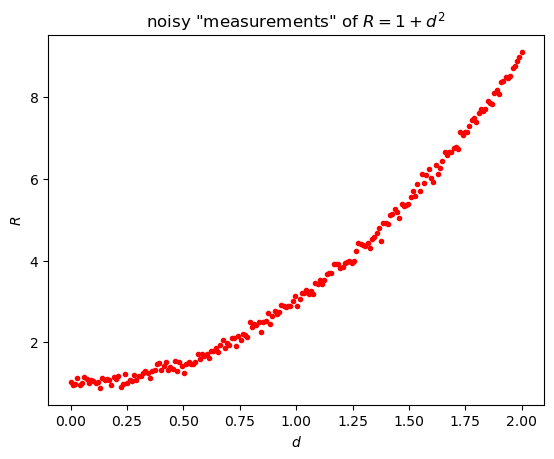

PyObject Text(0.5, 1.0, 'noisy "measurements" of $R = 1 + d^2$')

In [16]:
d = range(0,2,length=200) # 20 points from 1 to 4
b = 1 .+ 2*d.^2 + randn(200)*0.1 # measurements with Gaussian random noise
plot(d, b, "r.")
xlabel(L"d")
ylabel(L"R")
title("noisy \"measurements\" of \$R = 1 + d^2\$")

The corresponding matrix $A$ is:

In [17]:
A = [d.^0 d.^2]

200×2 Matrix{Float64}:
 1.0  0.0
 1.0  0.000101008
 1.0  0.00040403
 1.0  0.000909068
 1.0  0.00161612
 1.0  0.00252519
 1.0  0.00363627
 1.0  0.00494937
 1.0  0.00646448
 1.0  0.00818161
 1.0  0.0101008
 1.0  0.0122219
 1.0  0.0145451
 ⋮    
 1.0  3.57001
 1.0  3.60809
 1.0  3.64637
 1.0  3.68486
 1.0  3.72354
 1.0  3.76243
 1.0  3.80152
 1.0  3.84081
 1.0  3.88031
 1.0  3.92
 1.0  3.9599
 1.0  4.0

In [18]:
rank(A)

2

$A$ doesn't have an inverse, of course:

In [19]:
inv(A)

LoadError: DimensionMismatch: matrix is not square: dimensions are (200, 2)

However, if we blindly do `A \ b`, it seems to give us quite a reasonable $x$, very close to the exact $x = (1,2)$ of the underlying data:

In [20]:
x̂ = A \ b

2-element Vector{Float64}:
 1.0048471857607686
 2.0004287433284778

What is it doing?  Let's plot the curve from the coefficients `A \ b`:

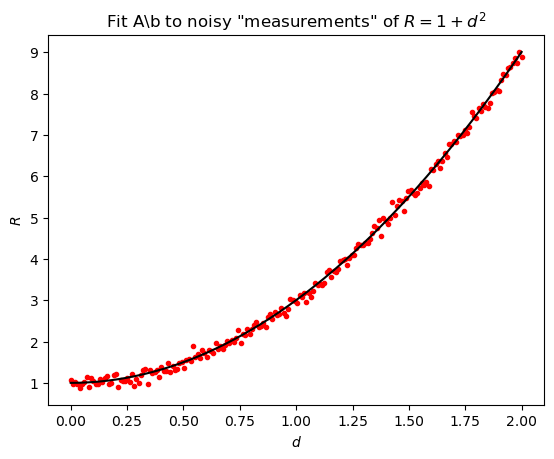

PyObject Text(0.5, 1.0, 'Fit A\\b to noisy "measurements" of $R = 1 + d^2$')

In [21]:
d = range(0,2,length=200) # 20 points from 1 to 4
b = 1 .+ 2*d.^2 + randn(200)*0.1 # measurements with Gaussian random noise
plot(d, b, "r.")
plot(d, x̂[1] .+ x̂[2] * d.^2, "k-")
xlabel(L"d")
ylabel(L"R")
title("Fit A\\b to noisy \"measurements\" of \$R = 1 + d^2\$")

In [22]:
norm(b - A*x̂) / norm(b)  # the length of the "residual" b - Ax̂ is not zero!

0.02329803324253318

This $\hat{x}$ is *not* an exact solution: $A\hat{x} \ne b$: the "residual" (the "error") $b - A\hat{x}$ is not zero, as we can see by checking its norm $\Vert b - A\hat{x}\Vert$ above.

In the plot above, correspondingly, the black "fit" curve does *not* exactly match the data points.  But it is pretty close!

# Least-square fits

What `A \ b` is doing in Julia, for a non-square "tall" matrix $A$ as above, is computing a **least-square fit** that **minimizes the sum of the square of the errors**.   This is an extremely important thing to do in many areas of linear algebra, statistics, engineering, science, finance, etcetera.

Above, we have a bunch of measurements $(d_k, R_k)$, and we are trying to *fit* it to a function $R(x,d) = x_1 + x_2 d^2$.   There is no exact fit, so instead we minimize the sum of the squares of the errors:

$$
\min_{x \in \mathbb{R}^2} \sum_{k=1}^m (R_k - R(x, d_k))^2 \;.
$$

Let's write this in terms of linear-algebra operations.  We have our $m \times 2$ matrix $A$ above, and in terms of this we have $R(x, d_k) = (Ax)_k$: the "fit" function at $d_k$ is the $k$-th row of $Ax$.  But then $R_k - R(x,d_k)$ is the $k$-th row of the **residual vector**

$$
\mbox{residual} = b - Ax
$$

and we can see that our sum above is precisely the **sum of the squares of the residual components**, which is the **square of the length of the residual**:

$$
\sum_{k=1}^m (R_k - R(x, d_k))^2 = \Vert b - Ax \Vert^2 \; .
$$

Here, $\Vert y \Vert = \sqrt{y^T y}$ is the *length* of a vector, also called the **norm of the vector**: the square root of the dot product with itself.  (More specifically, this is the [Euclidean norm](https://en.wikipedia.org/wiki/Euclidean_distance), also called the $L^2$ norm.  There are other ways to define a vector norm, but I think this is the only one we will use in 18.(C)06.)

So, what we are *really* doing is **minimizing the norm of the residual**:

$$
\boxed{
\min_{x \in \mathbb{R}^2} \Vert b - Ax \Vert
}
$$

(Note that minimizing the norm and minimizing the squared norm will give the same solution $x$; which one we write is a matter of convenience.)

This is exactly what `A \ b` does in Julia (and Matlab) for a non-square matrix $A$, which is why it gives us a good fit above.

## Least-squares fits and the normal equations

As derived in section 4.3 of the Strang textbook, minimizing $\Vert b - Ax\Vert$ or (equivalently) $\Vert b - Ax\Vert^2$ leads to the so-called **"normal equations"** for the minimizer $\hat{x}$:

$$
\boxed{ A^T A \hat{x} = A^T b }
$$

These *always* have a solution.  If $A$ is an $m \times n$ matrix, then $A^T A$ is $n \times n$, and:

* Usually in fitting problems, $A$ is a "tall" matrix with full column rank $n$, in which case $\operatorname{rank}(A^T A) = \operatorname{rank}(A) = n$ and $A^T A$ is *invertible*: the solution $\hat{x}$ exists and is unique.

* Even if $\operatorname{rank}(A) < n$, we still have a (non-unique) solution, because $A^T b \in C(A^T) = N(A)^\perp = N(A^T A)^\perp = C(A^T A)$.

Now (on the blackboard), I will show that we can derive the normal equations directly by 18.02.  If we just take the partial derivatives of $f(x) = \Vert b - Ax \Vert^2$ and set them to zero, we find that $0 = \nabla_x f = 2A^T Ax - 2A^T b$ and the normal equations follow.

# More polynomial fitting examples.

Suppose we are fitting m points $(a_k,b_k)$ to a degree-(n+1) polynomial of the form

$$
p(a) = x_1 + x_2 a + x_3 a^2 + \cdots + x_n a^{n-1} \; ,
$$

which leads to the $m \times n$ matrix (called a ["Vandermonde" matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix))

$$
A = \begin{pmatrix}
        1 & a_1 & a_1^2 & \cdots a_1^{n-1} \\
        1 & a_2 & a_2^2 & \cdots a_2^{n-1} \\
        1 & a_3 & a_3^2 & \cdots a_3^{n-1} \\
        \vdots & \vdots & \vdots & \vdots \\
        1 & a_m & a_m^2 & \cdots a_m^{n-1} \\
    \end{pmatrix}
$$

and hence to the normal equations for the fit coefficients $\hat{x}$.

Let's generate 50 data points from a degree-3 polynomial $1 + 2a + 3a^2 + 4a^3$ plus noise, and see what happens as we change the fitting degree $n$.

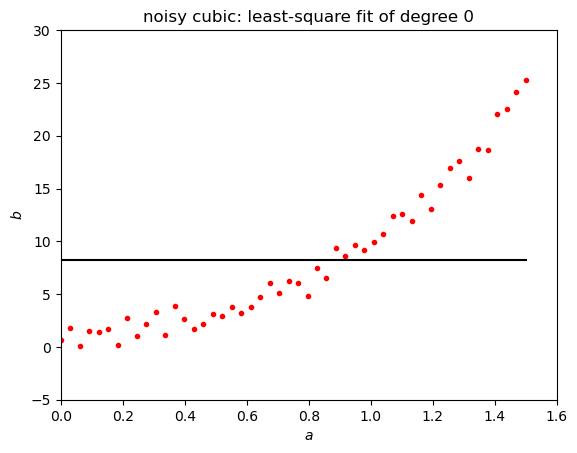

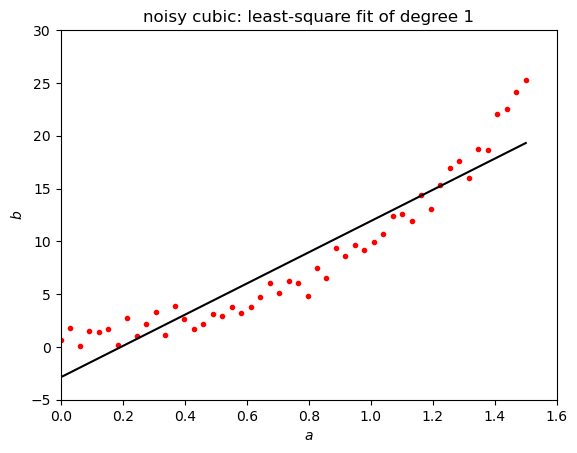

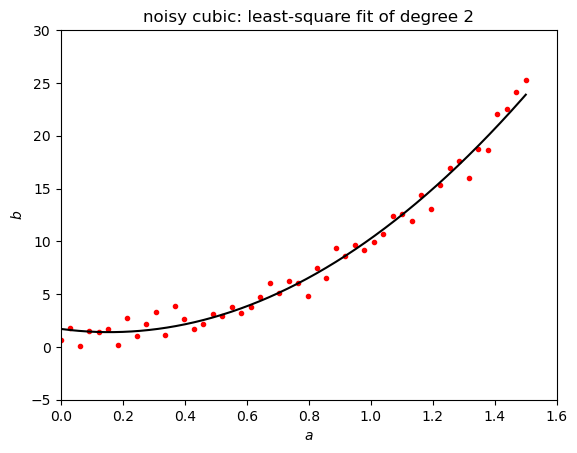

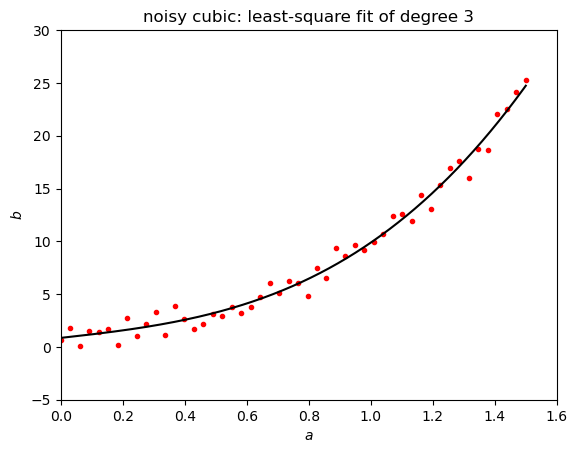

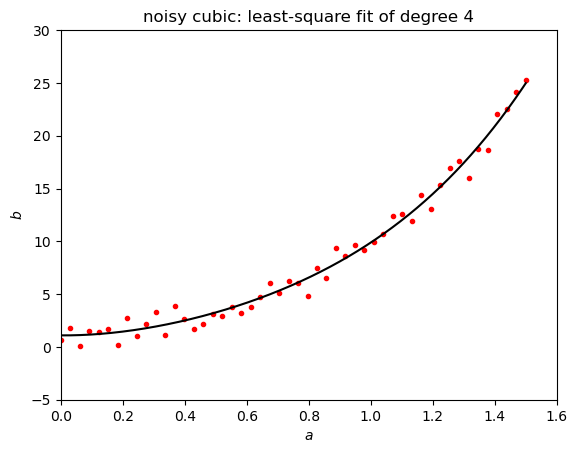

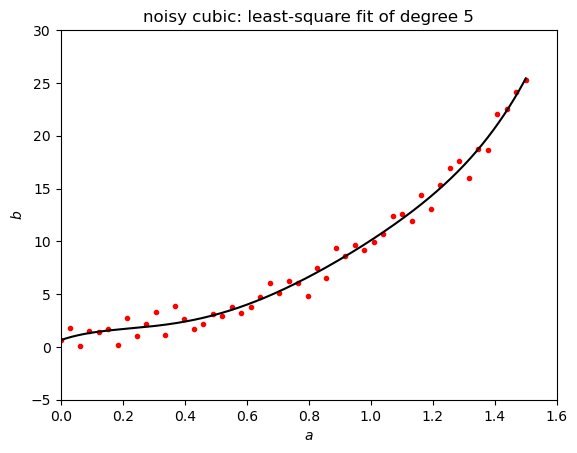

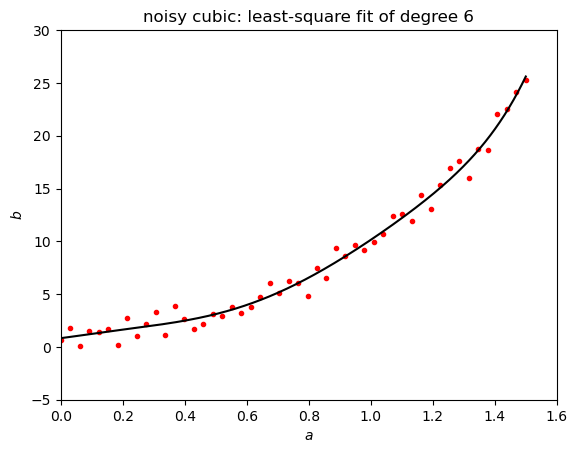

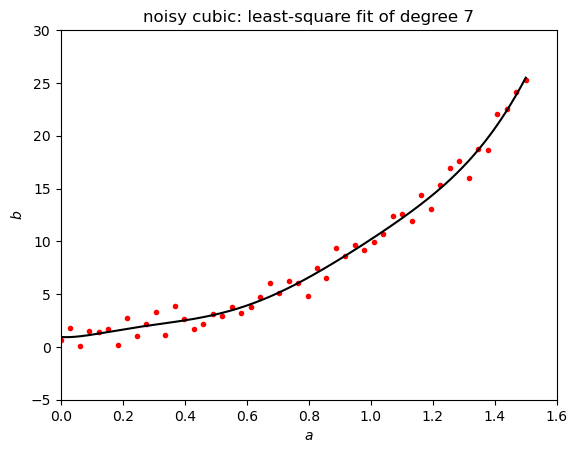

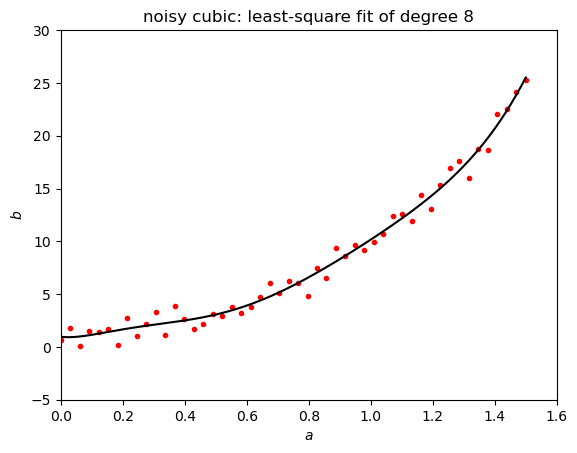

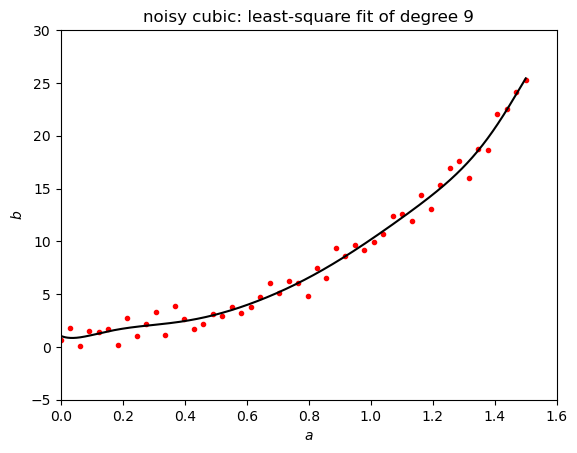

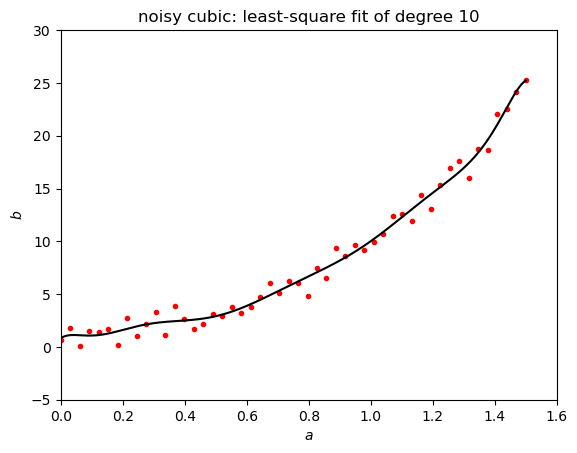

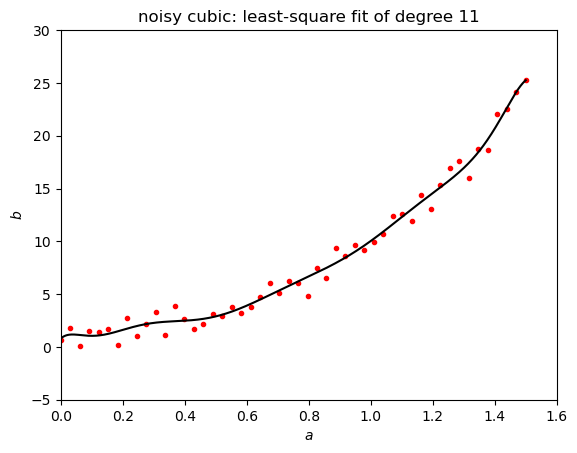

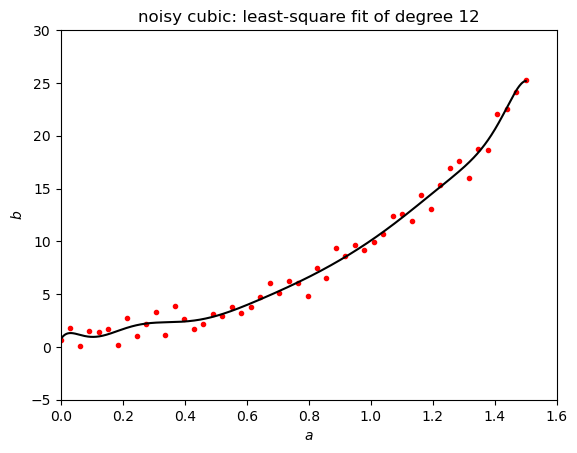

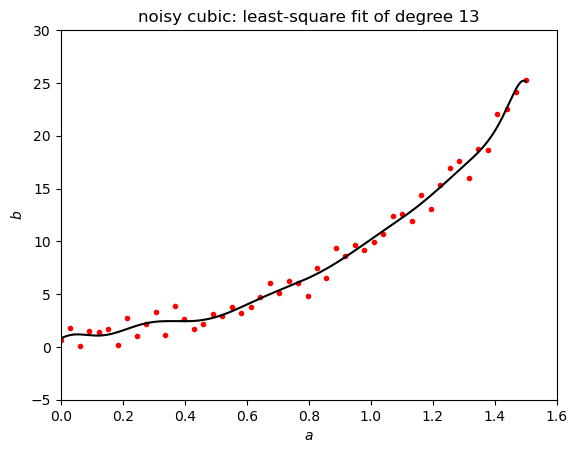

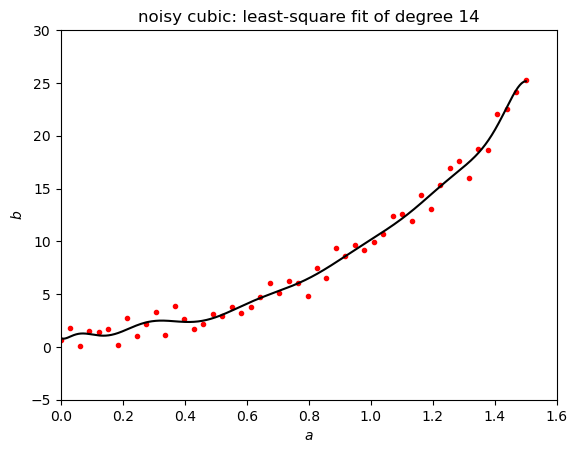

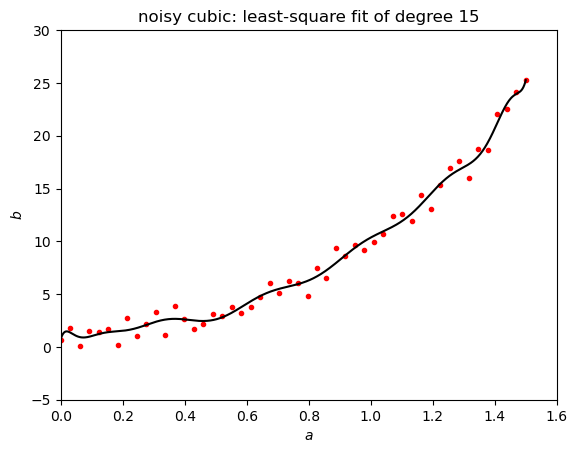

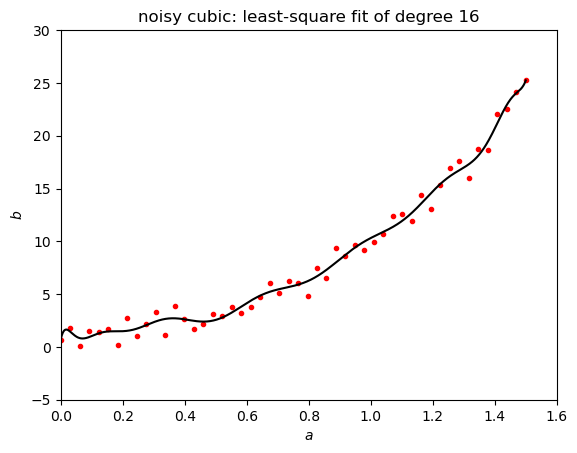

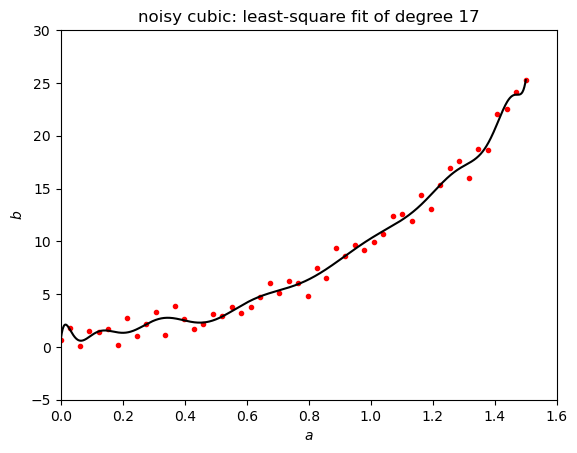

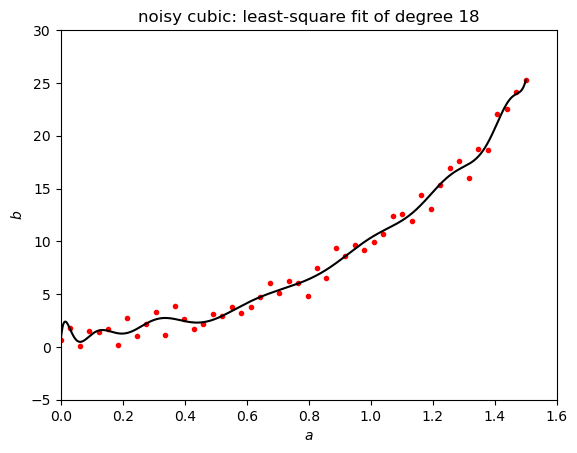

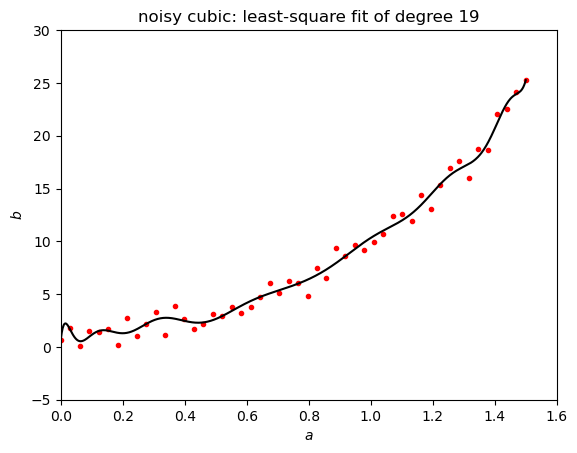

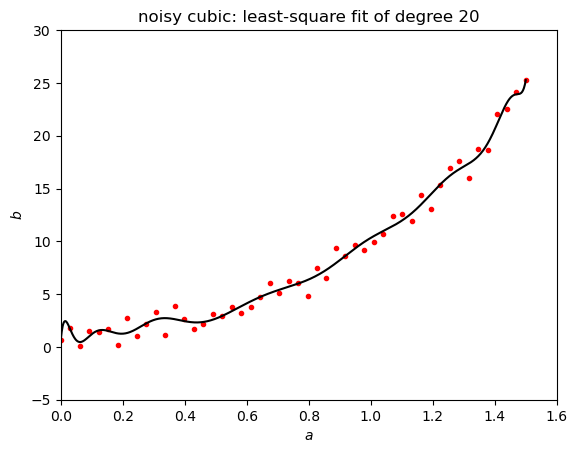

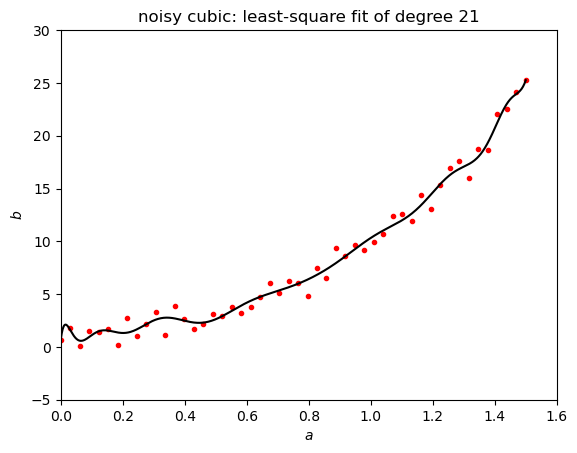

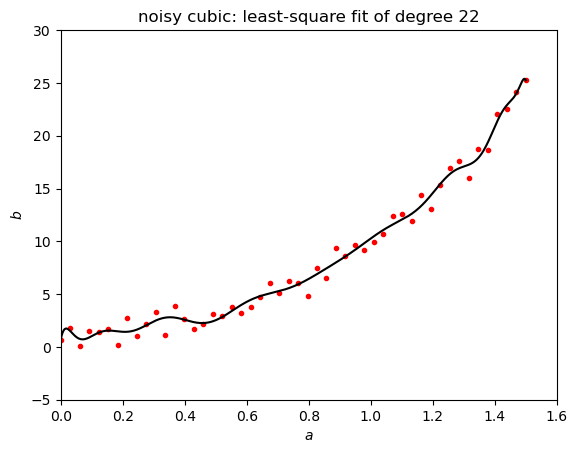

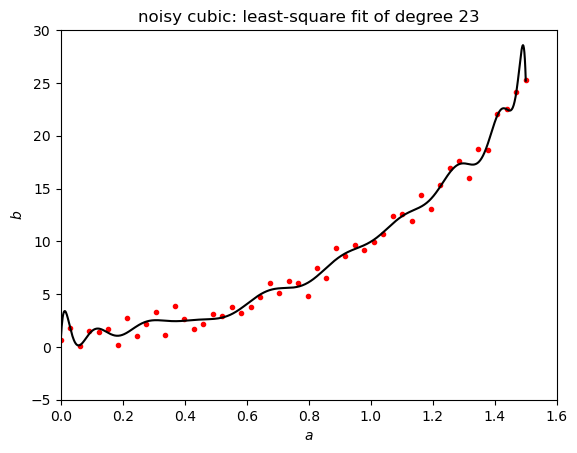

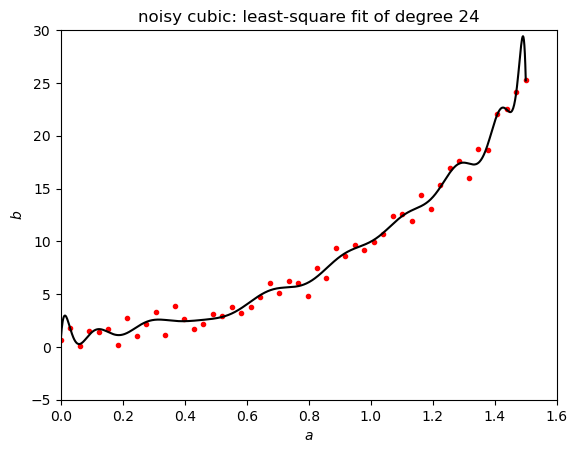

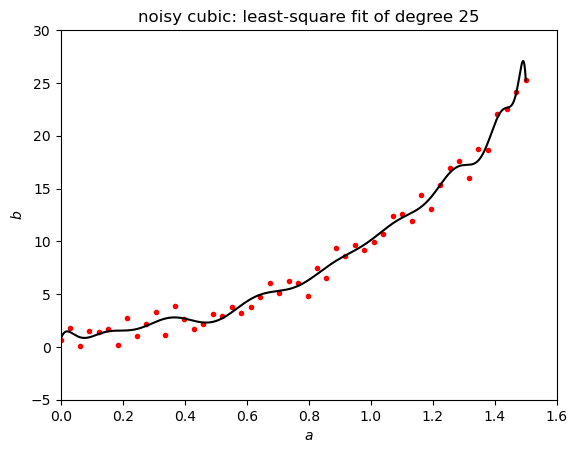

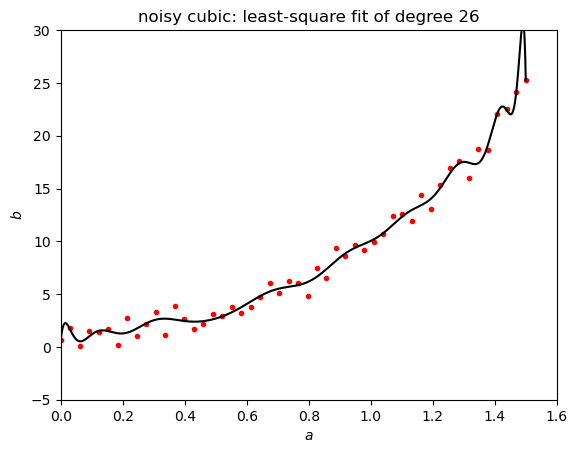

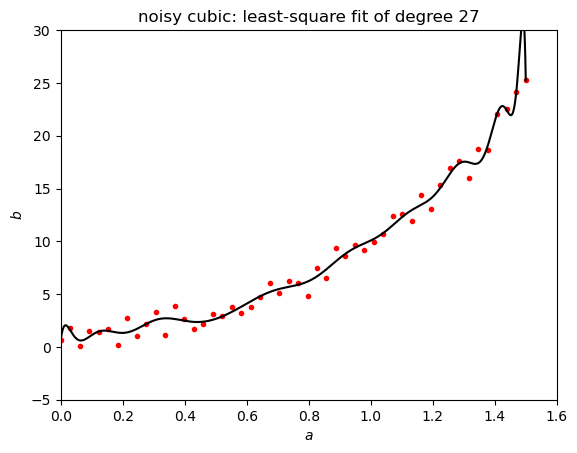

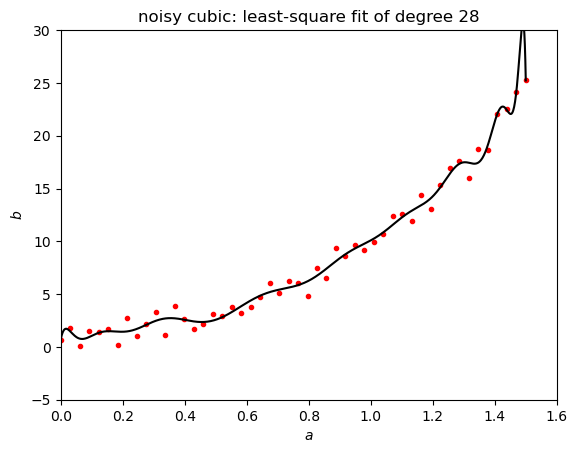

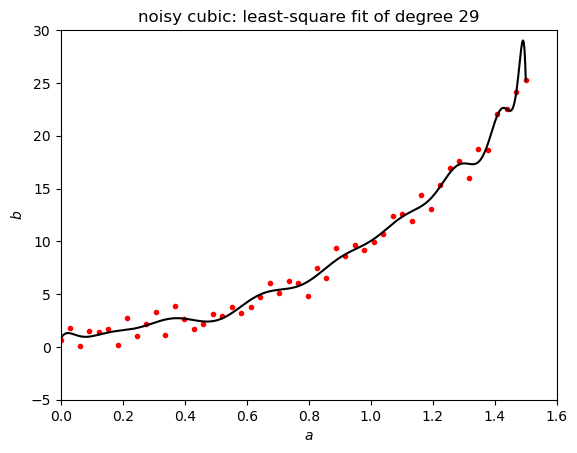

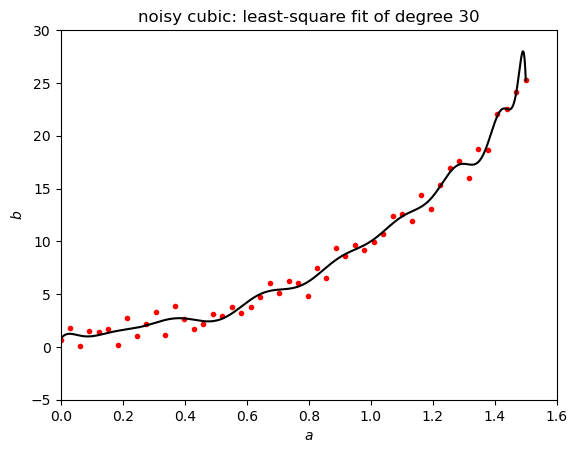

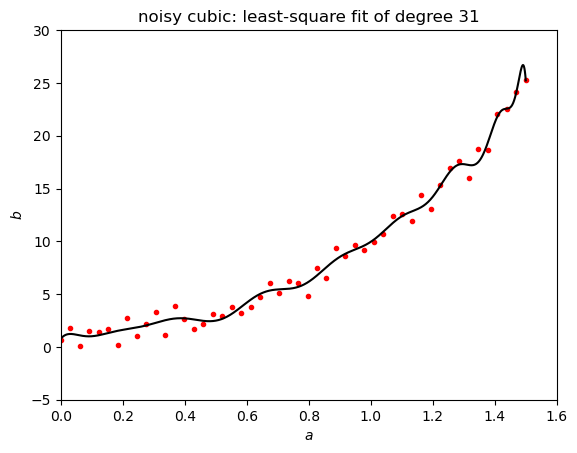

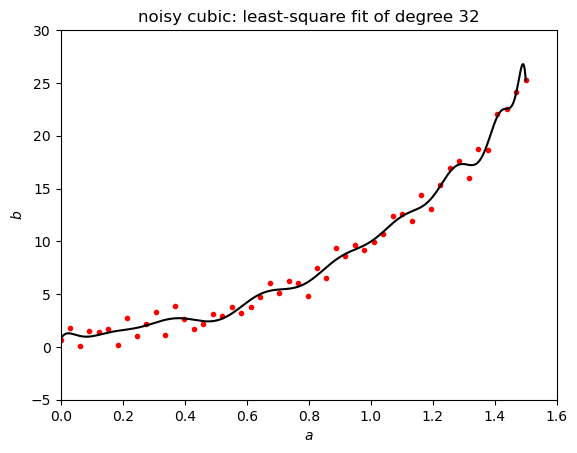

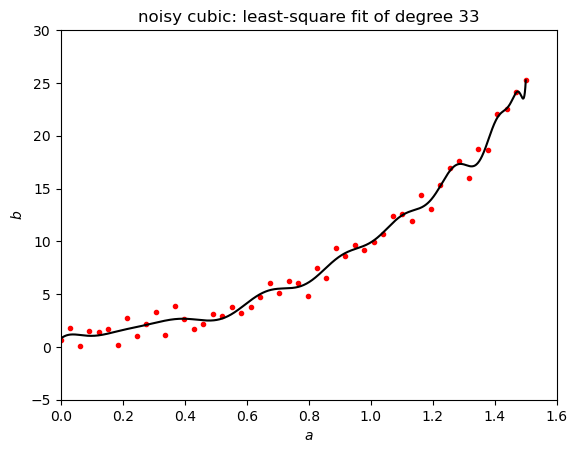

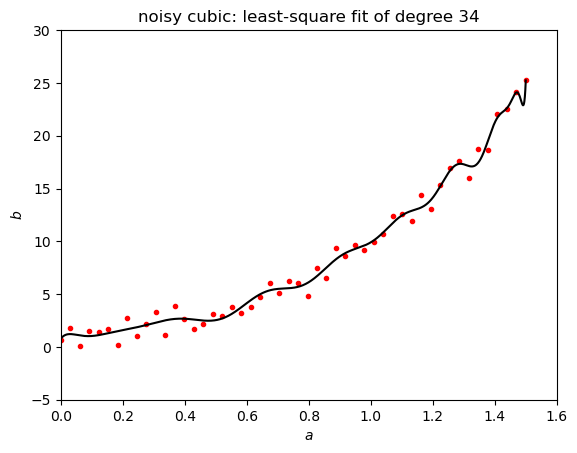

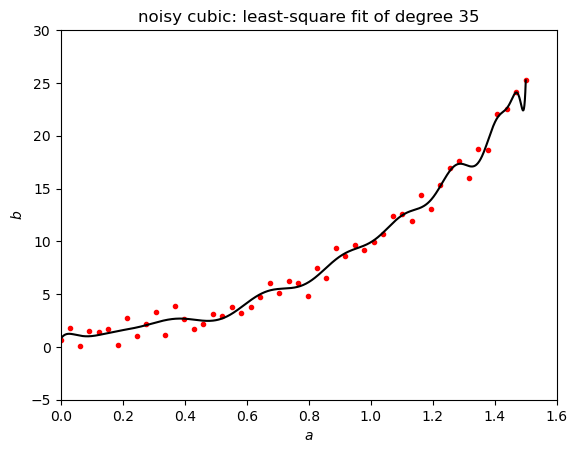

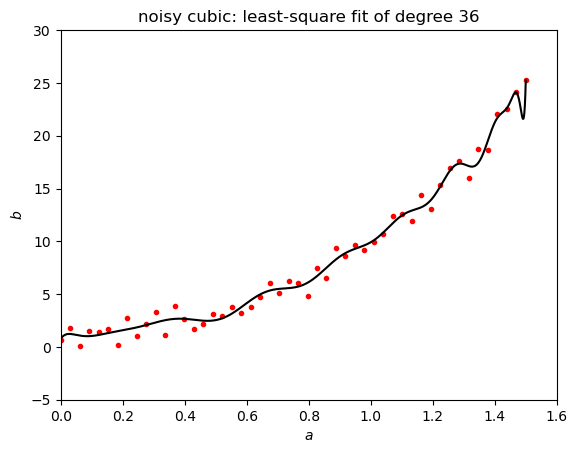

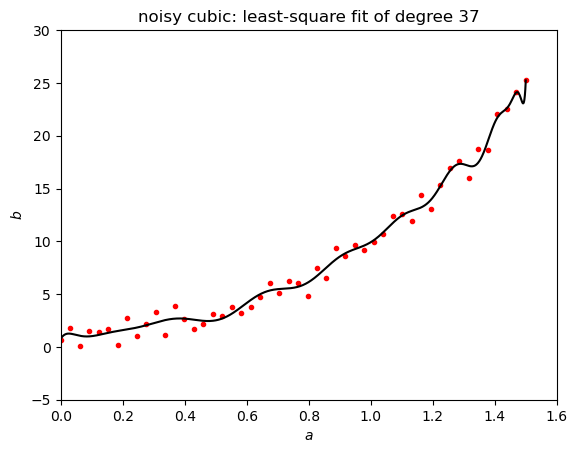

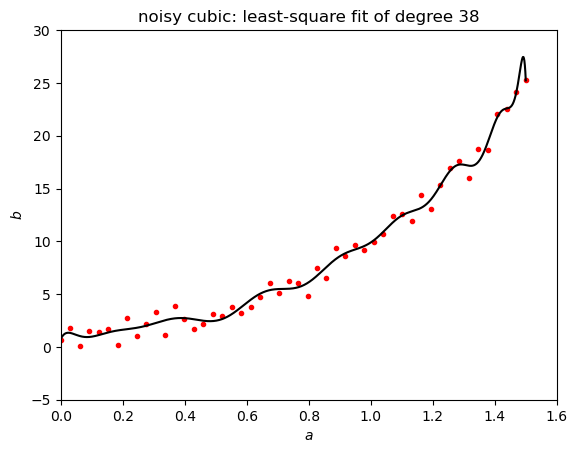

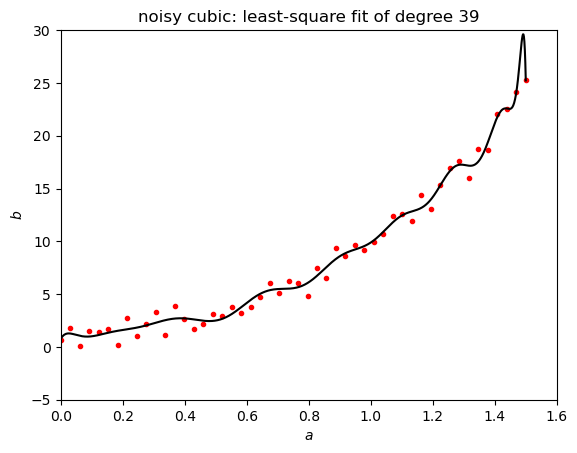

In [23]:
let a = range(0,1.5,length=50),
    afine = range(0,1.5,length=1000),
    b = 1 .+ 2a + 3a.^2 + 4a.^3 + randn(length(a)),
    fig = figure()
    #@manipulate for n=slider(1:40, value=2)
    for n=1:40
        display(
        withfig(fig) do
            plot(a, b, "r.")
            A = a .^ (0:n-1)'
            x̂ = A \ b
            plot(afine, (afine .^ (0:n-1)') * x̂, "k-")
            xlabel(L"a")
            ylabel(L"b")
            xlim(0,1.6)
            ylim(-5,30)
            title("noisy cubic: least-square fit of degree $(n-1)")
        end
        )
    end
end

Increasing the degree of the fit at first seems to improve things, up to about degree 6, but then it becomes more and more wiggly.  It is still reducing the residual, but clearly it is "fitting noise" and the error actually becomes worse compared to the "real" underlying cubic model.  This problem is called [overfitting](https://en.wikipedia.org/wiki/Overfitting).

In between the fitted points, especially near the edges, the wiggles can actually diverge as we increase the degree, an effect related to what is known as a [Runge phenomenon](https://en.wikipedia.org/wiki/Runge's_phenomenon).

## Detecting Overfitting: Training vs. Test/Validation Data

In order to detect overfitting, and more generally to evaluate whether our fit is doing a good job, a common practice is to **subdivide** the data into at least two subsets: ["training" and "test" data](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets).

* **Training** data is what we use to form our fit/model — it goes into $A$ and $b$ in a least-square fit.  This is usually *most* of the data
* **Test** data is a subset of the data used to *check* whether the fit is actually doing a good job on the underlying problem.    Sometimes, this is further subdivided into "validation" data that is used *during* training while tuning hyperparameters like the degree of polynomial being fitted, versus "test" data that is used as a final check after everything is done.

Here, let's consider the same problem as above: 50 data points from a degree-3 polynomial $1 + 2a + 3a^2 + 4a^3$ plus noise, but
* We'll use a random subset of **20% of the data for testing**, with the remaining 80% for training/fitting.
* For each degree $n$, we'll do a least-squares fit on the training data, and then evaluate the **root-mean-square error on the test data**.

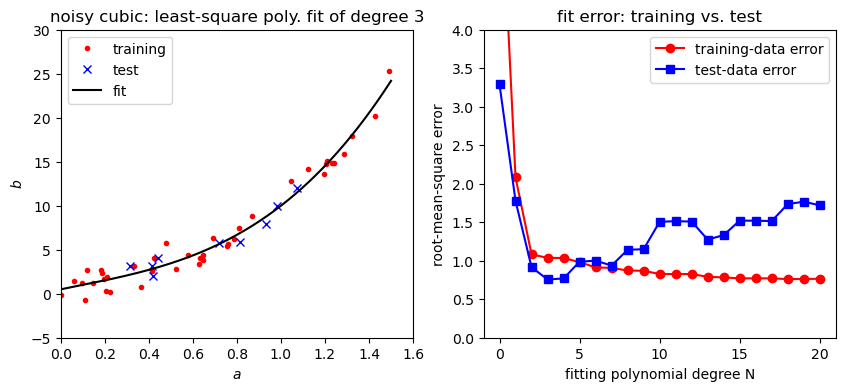

PyObject <matplotlib.legend.Legend object at 0x147e86ec0>

In [27]:
using Random

npoints = 50

let a = sort!(rand(npoints) * 1.5),
    afine = range(0,1.5,length=1000),
    b = 1 .+ 2a + 3a.^2 + 4a.^3 + randn(length(a)),
    itest = randsubseq(eachindex(a), 0.2) # 20% of indices for test data

    atest = a[itest]
    btest = b[itest]
    deleteat!(a, itest) # remove test data from training data
    deleteat!(b, itest)

    # evaluate rms error on test data vs degree n
    Ns = 0:20
    test_rms_err = [
        let A = a .^ (0:N)', x̂ = A \ b # fit test data
            Atest = atest .^ (0:N)'
            norm(Atest * x̂ - btest) / sqrt(length(atest))
        end
        for N in Ns
    ]
    training_rms_err = [
        let A = a .^ (0:N)', x̂ = A \ b # fit test data
            norm(A * x̂ - b) / sqrt(length(a))
        end
        for N in Ns
    ]

    figure(figsize=(10,4))
    
    subplot(1,2,1)
    plot(a, b, "r.")
    plot(atest, btest, "bx")
    N = 3
    A = a .^ (0:N)'
    x̂ = A \ b
    plot(afine, (afine .^ (0:N)') * x̂, "k-")
    xlabel(L"a")
    ylabel(L"b")
    xlim(0,1.6)
    ylim(-5,30)
    title("noisy cubic: least-square poly. fit of degree $N")
    legend(["training", "test", "fit"])
    
    subplot(1,2,2)
    plot(Ns, training_rms_err, "ro-")
    plot(Ns, test_rms_err, "bs-")
    xlabel("fitting polynomial degree N")
    ylabel("root-mean-square error")
    ylim(0, 4)
    title("fit error: training vs. test")
    legend(["training-data error", "test-data error"])
end

Some key things to observe:

* As we increase the degree (i.e. add more fit parameters), the **error on the training data decreases**.   We can "fit all the wiggles" — if you have enough parameters ["you can fit an elephant"](https://en.wikipedia.org/wiki/Von_Neumann%27s_elephant).
* However, as the degree increases beyond 3 (the "ground truth" underlying model), the **error on the training data stops decreasing** and soon **begins to increase**.   By "fitting the wiggles" of the training data, we have begun to "overfit" the problem, and the fit actually gets *worse* in between the training points.
* The test error is rather fragile, and susceptible to large random fluctuations if we repeat our experiment.  (Though these fluctuations get smaller if we generate more data.)   **Precisely detecting when overfitting begins can be difficult**.
* Overfitting is especially likely **when the number of parameters becomes comparable to the size of the training set**.   Here, we see significant overfitting even when the number of parameters is 1/4 the size of the training set!  (This is a huge challenge for neural-network models, which often have a vast number of parameters.)

## Fitting smooth functions: Equally spaced points and Runge phenomena

Above, in between the fitted points, especially near the edges, we saw that the wiggles can actually diverge as we increase the degree.  This effect is related to what is known as a [Runge phenomenon](https://en.wikipedia.org/wiki/Runge's_phenomenon). 

Even if there is **no noise**, fitting *equally spaced points* to high-degree polynomials can lead to disaster if the underlying data is not exactly polynomial.  Let's demonstrate this by fitting the *smooth* function $b(a) = 1/(1+25a^2)$ to polynomials at 50 points:

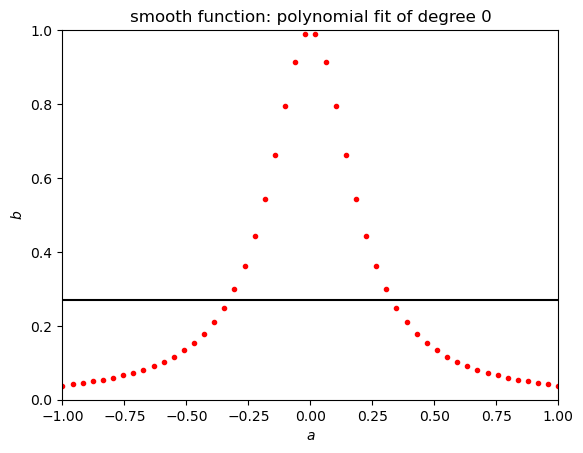

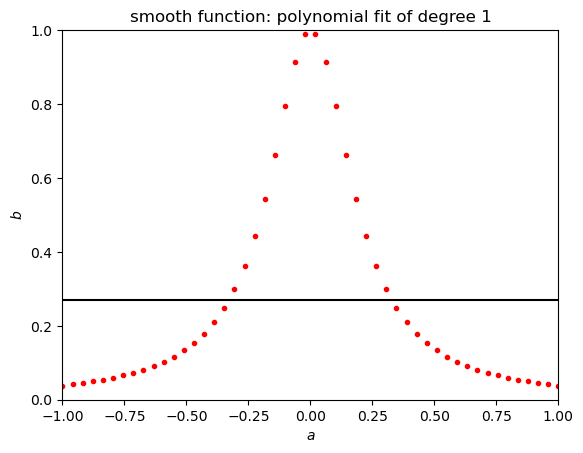

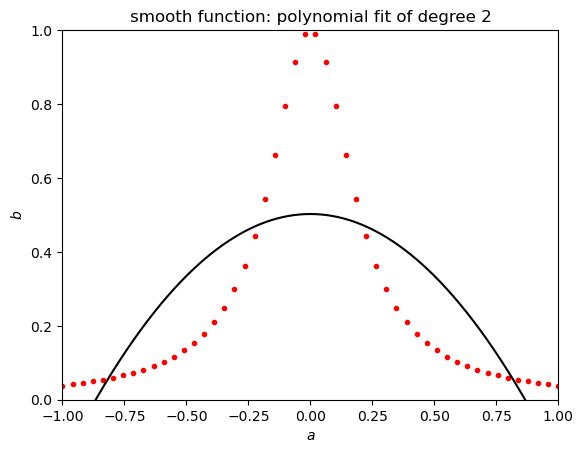

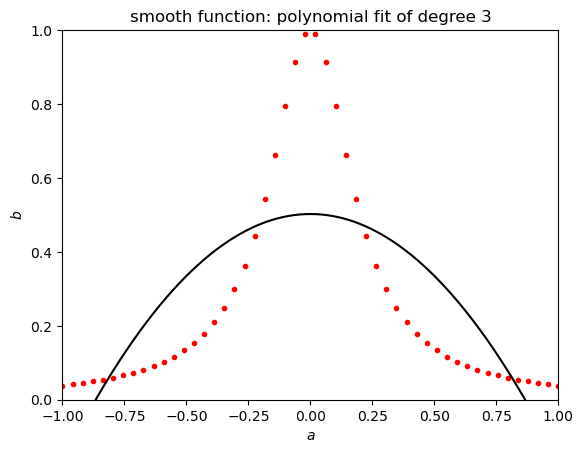

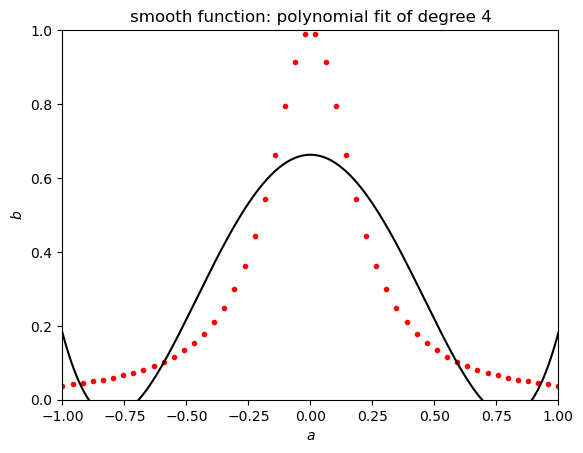

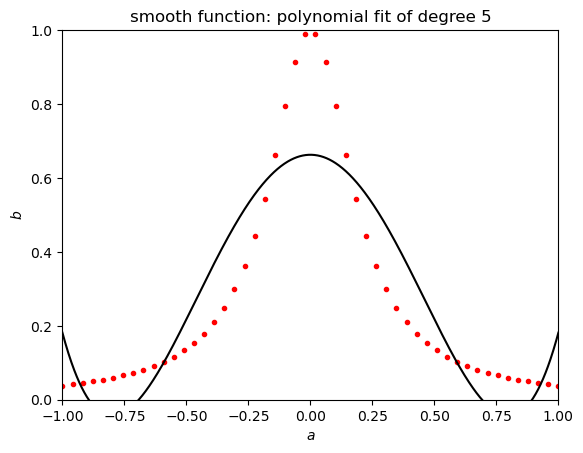

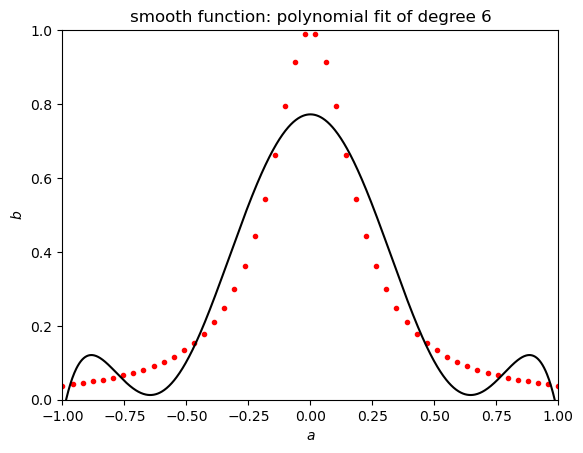

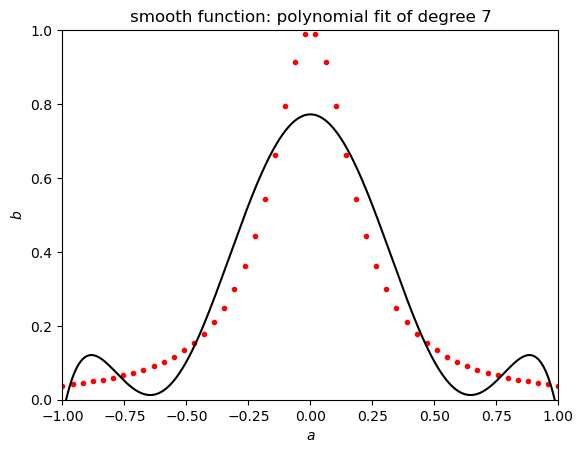

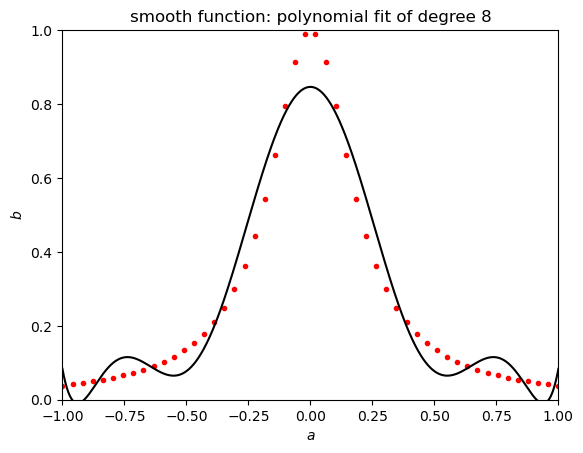

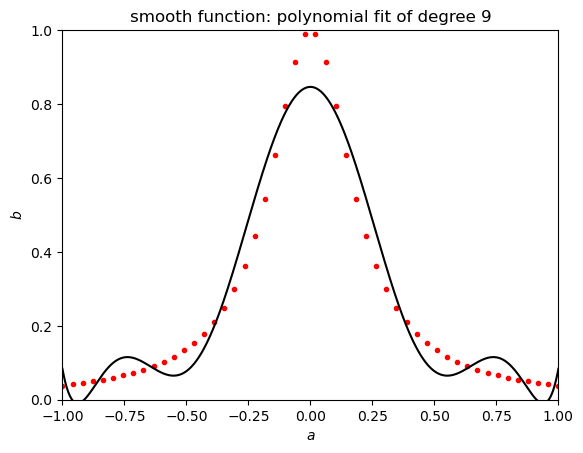

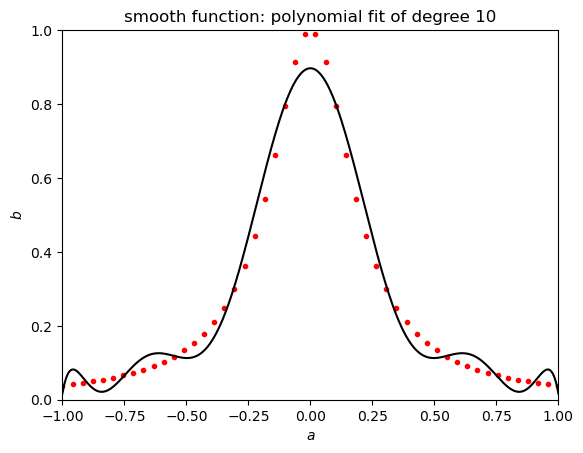

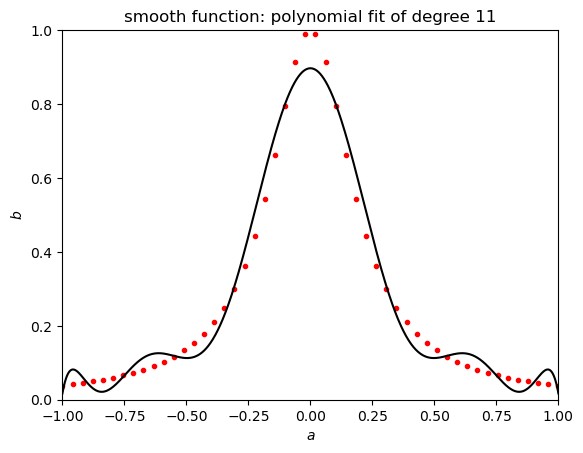

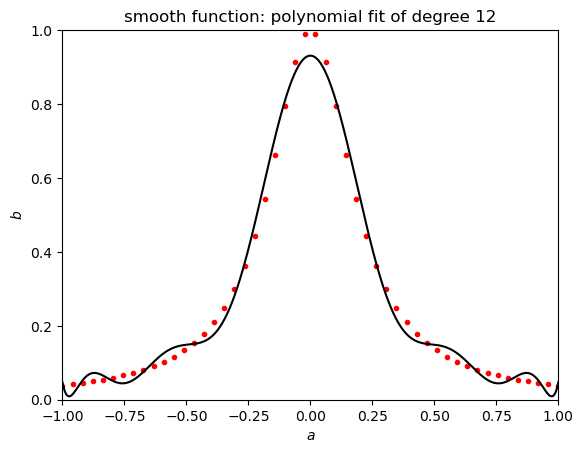

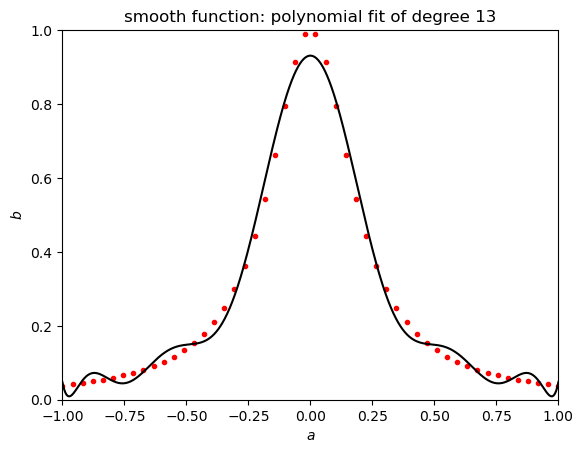

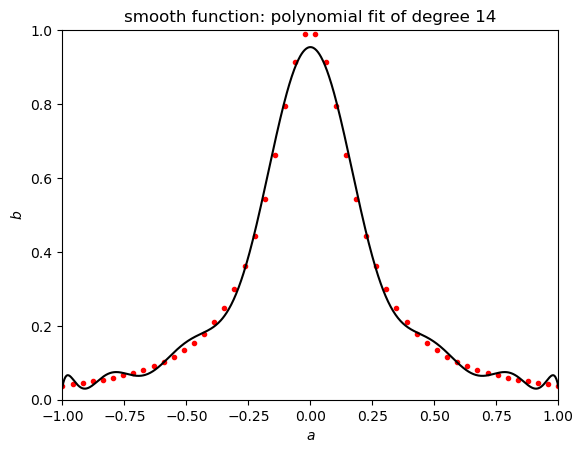

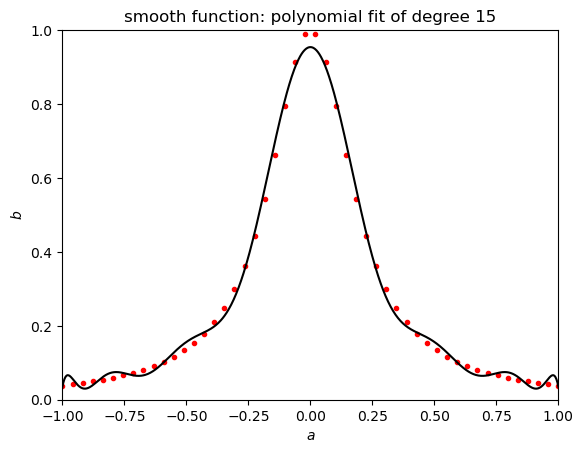

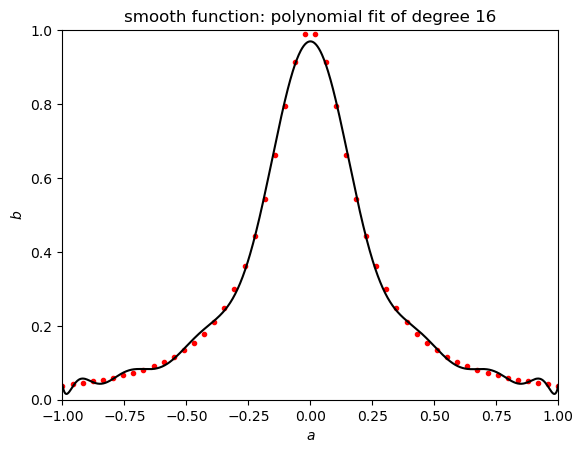

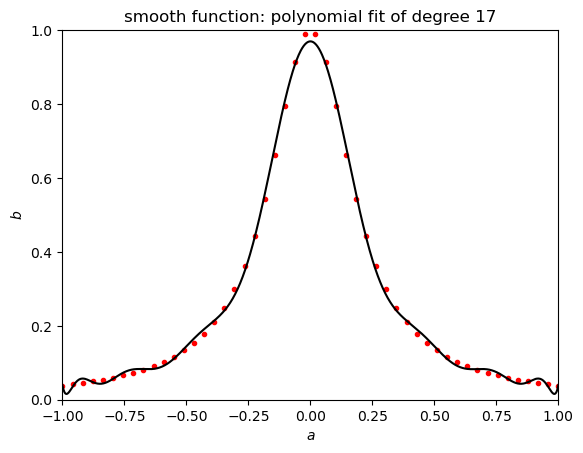

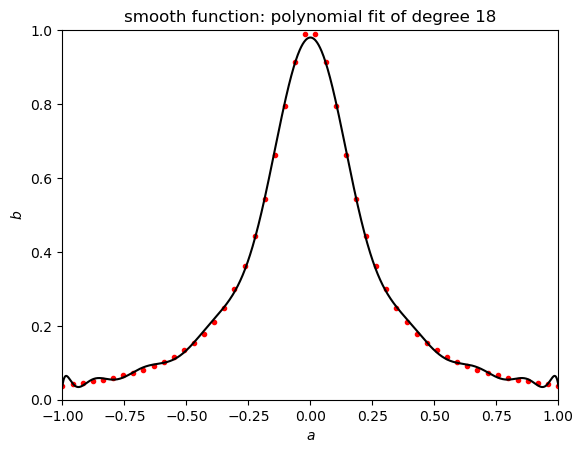

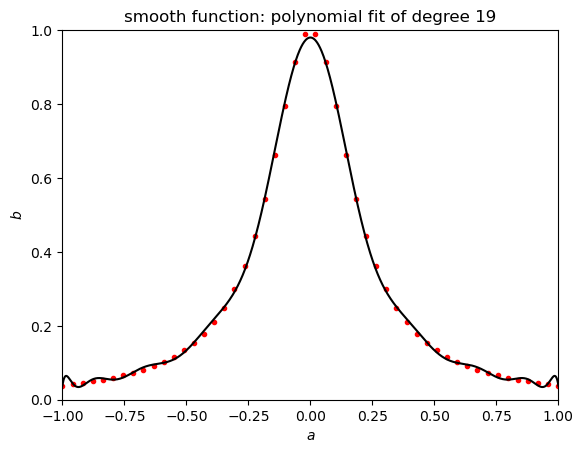

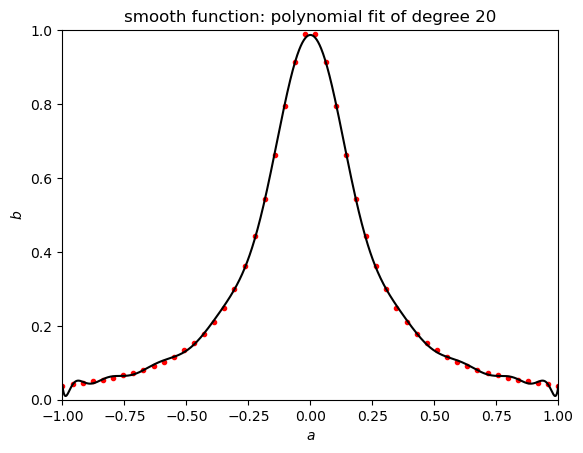

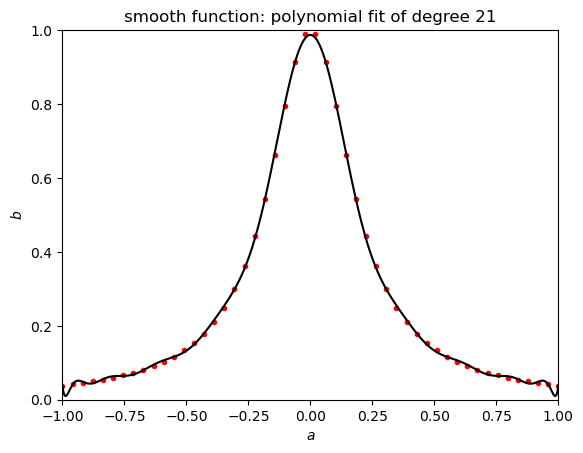

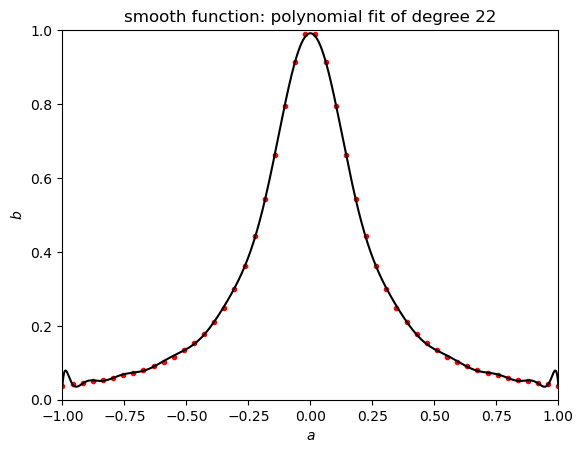

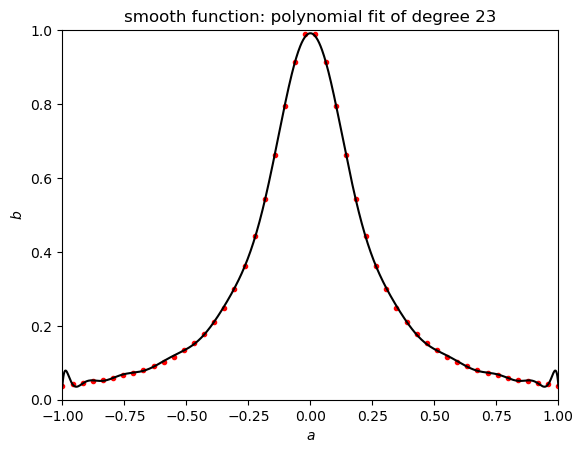

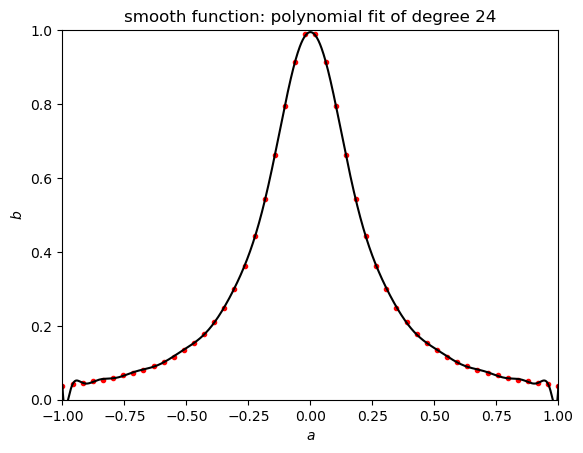

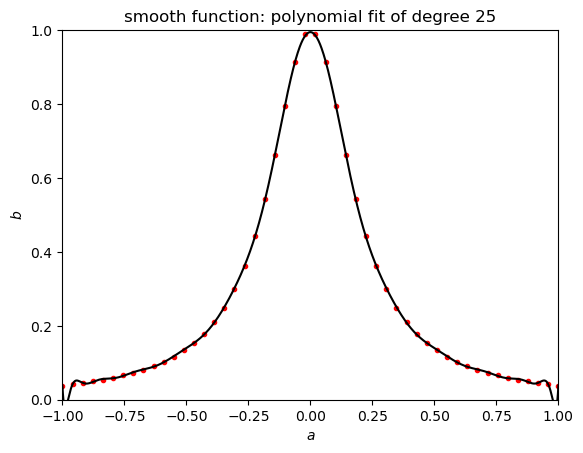

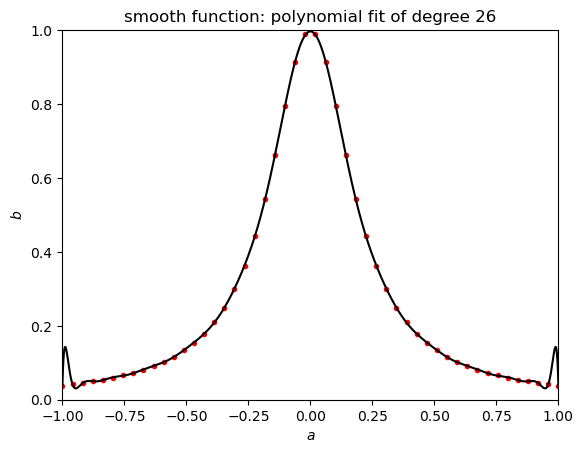

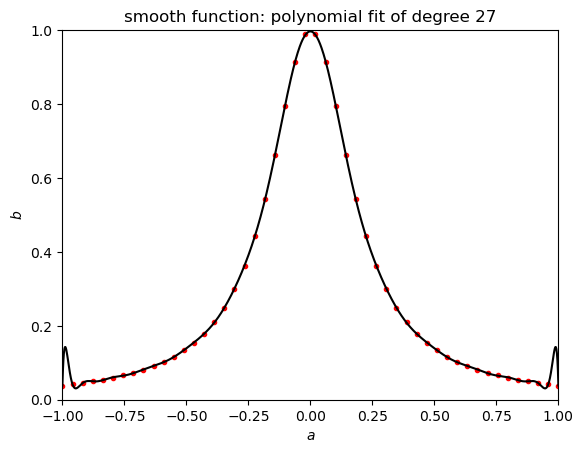

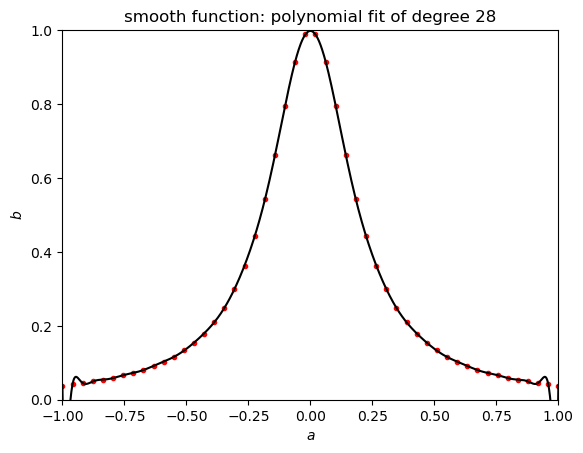

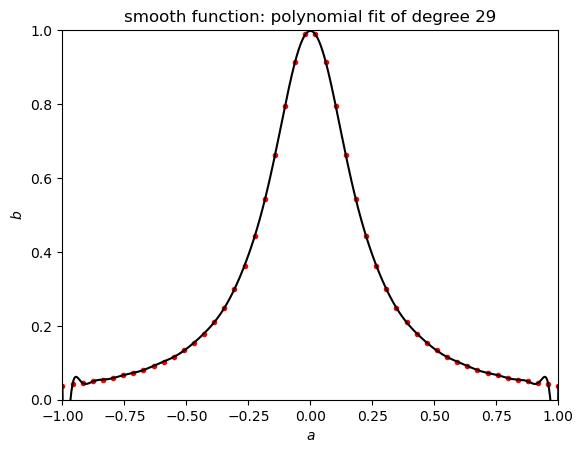

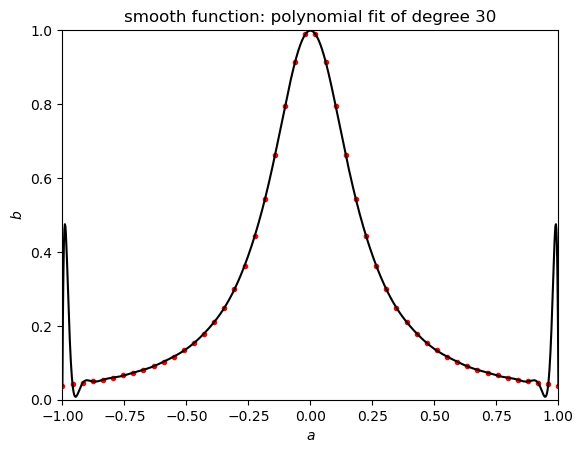

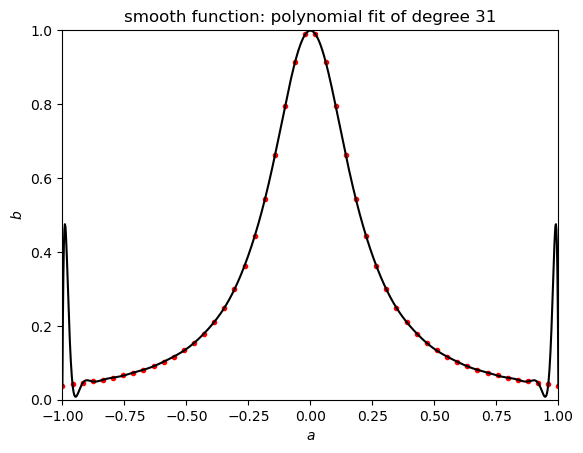

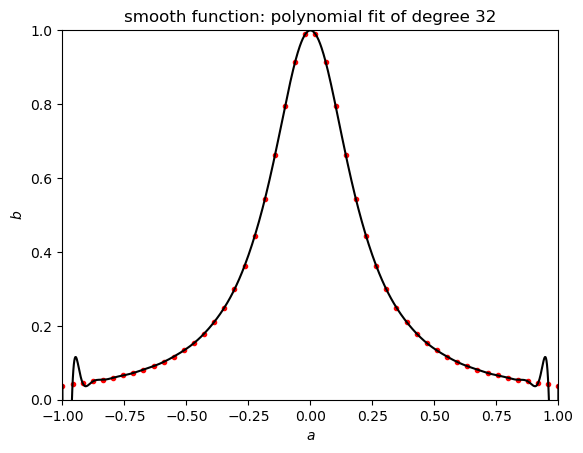

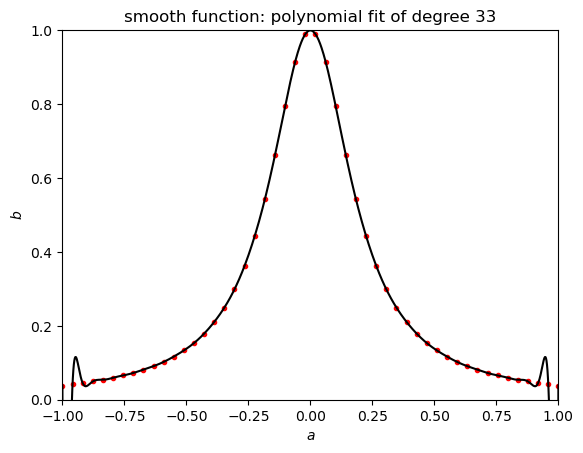

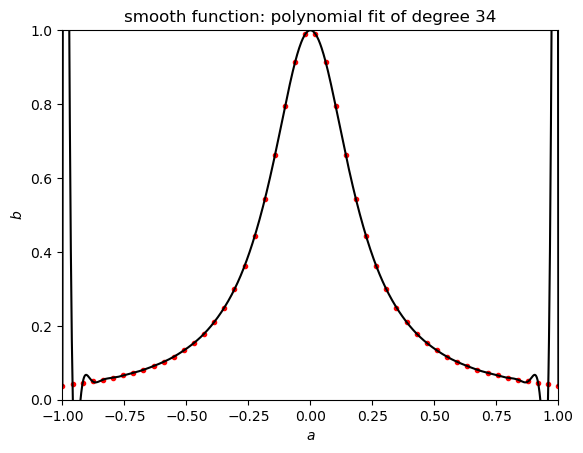

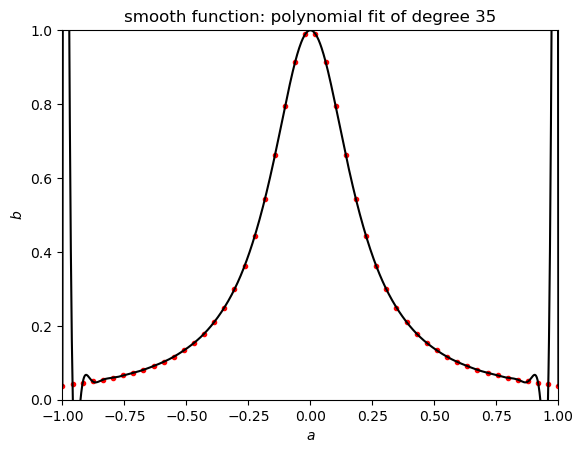

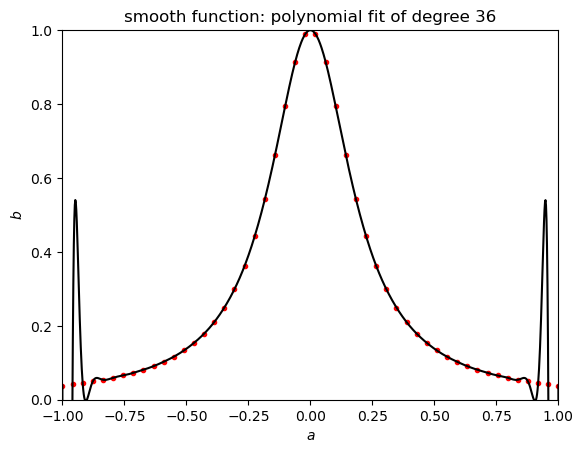

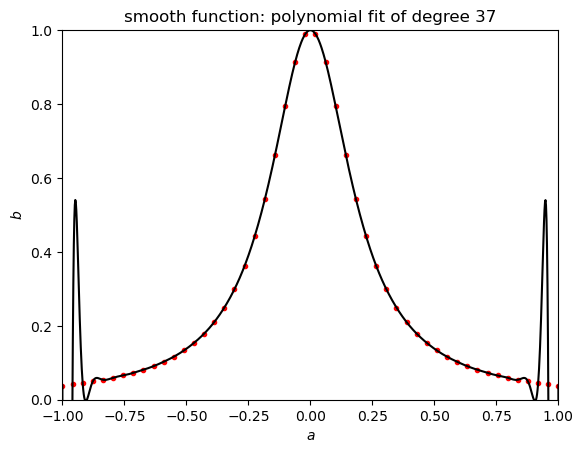

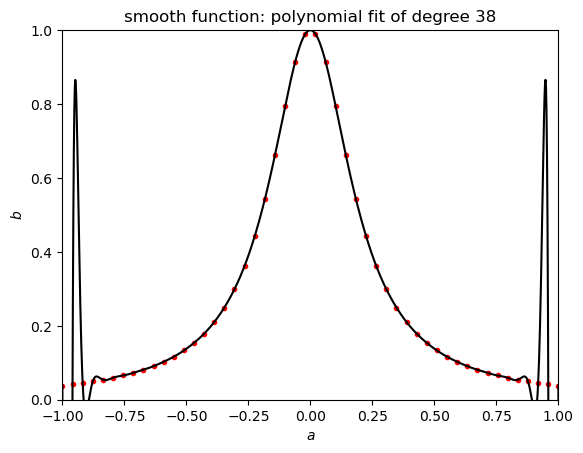

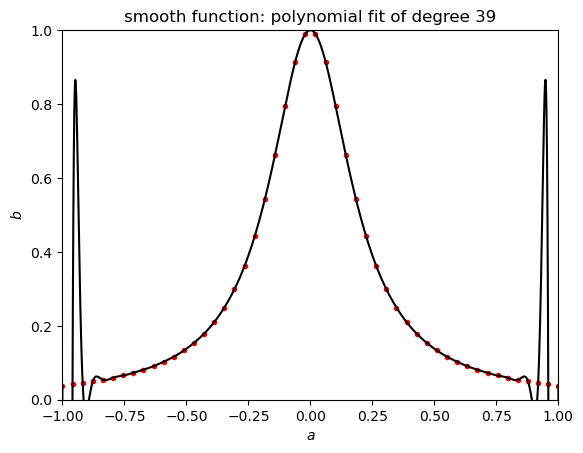

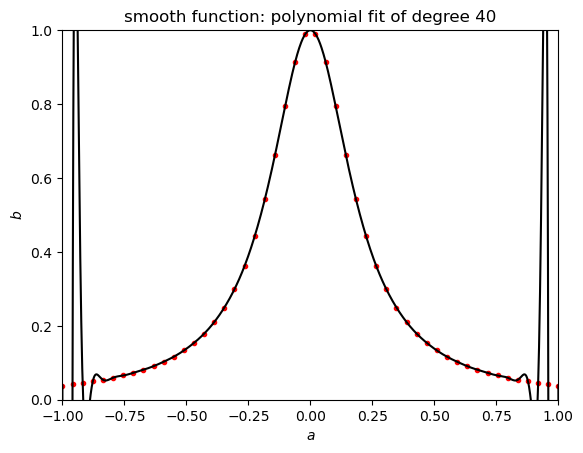

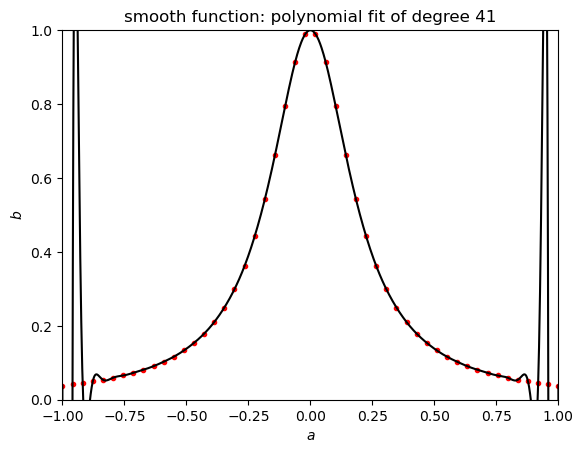

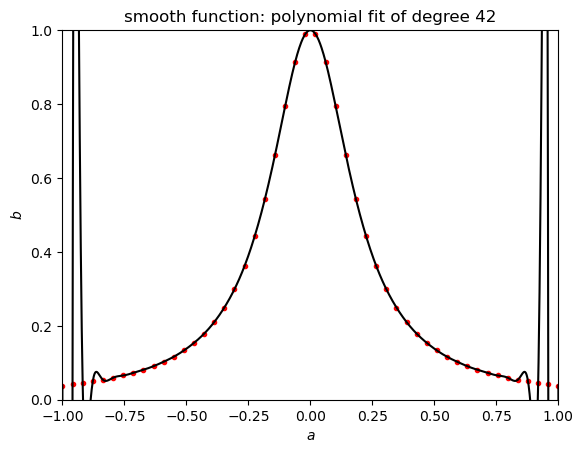

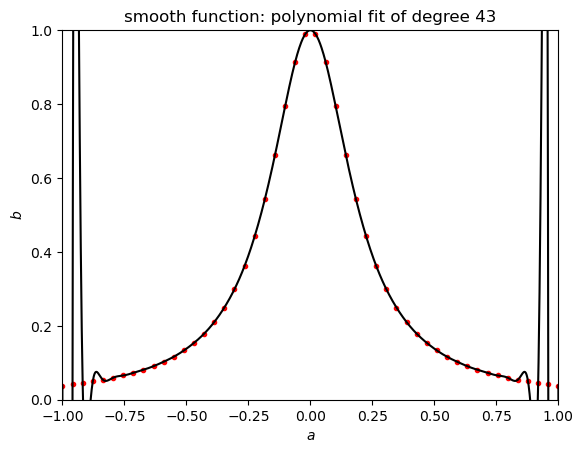

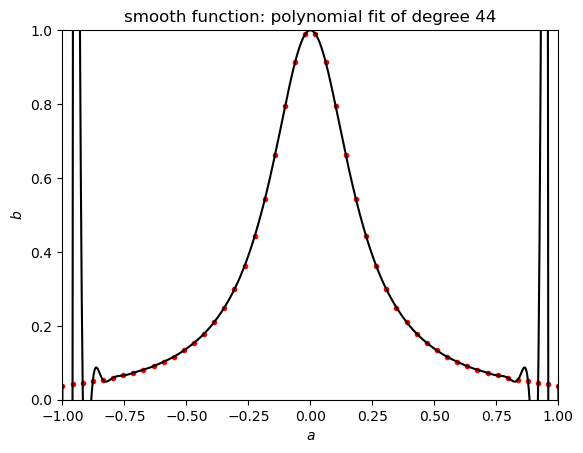

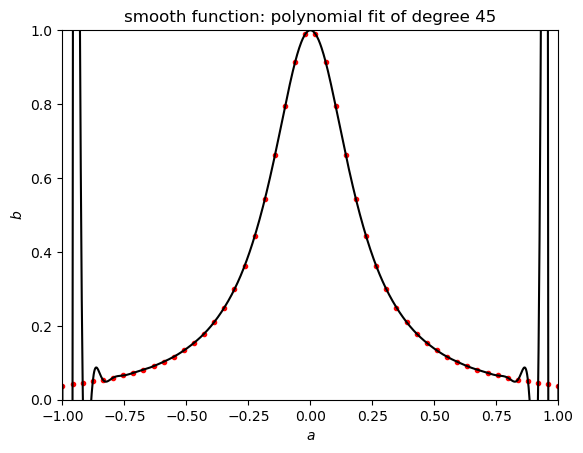

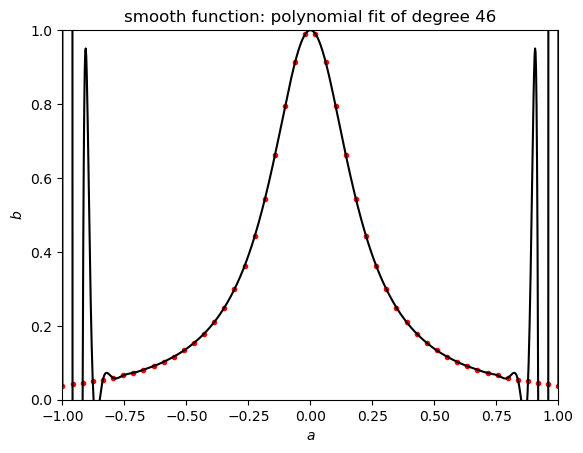

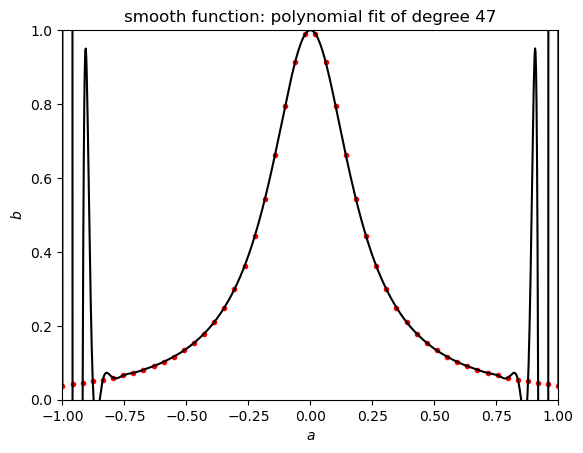

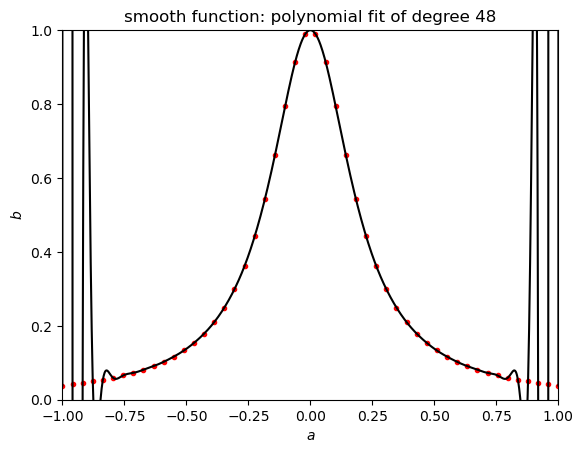

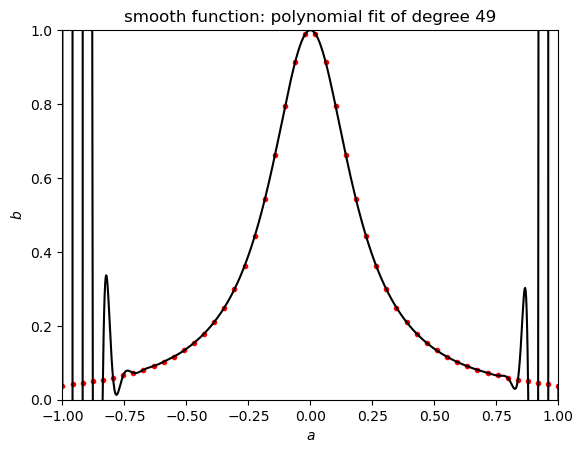

In [25]:
let a = range(-1,1,length=50),
    afine = range(-1,1,length=1000),
    b = 1 ./ (1 .+ 25 * a.^2),
    fig = figure()
    # @manipulate for n=slider(1:50, value=3)
    for n=1:50
        display(
        withfig(fig) do
            plot(a, b, "r.")
            A = a .^ (0:n-1)'
            x̂ = A \ b
            plot(afine, (afine .^ (0:n-1)') * x̂, "k-")
            xlabel(L"a")
            ylabel(L"b")
            xlim(-1,1)
            ylim(0,1)
            title("smooth function: polynomial fit of degree $(n-1)")
        end
        )
    end
end

Be careful not to draw the wrong lesson from this.   You have to be *especially careful* when fitting to high-degree polynomials, but this does *not* mean that you should never do it.

In particular, fitting smooth functions to high-degree polynomials can be a *great* thing to do, as **long as you choose the correct points**.  (Separately, as mentioned above, the construction of the interpolating polynomial should technically not be done by this matrix method once you go to high degrees — you run into roundoff-error problems — but there are better methods like the barycentric formula.)

For example, here we fit the same $1/(1+25a^2)$ function as above to a degree-49 polynomial, with no Runge problems at all, by choosing the points to be [Chebyshev nodes](https://en.wikipedia.org/wiki/Chebyshev_nodes) (which cluster together at the edges of the domain):

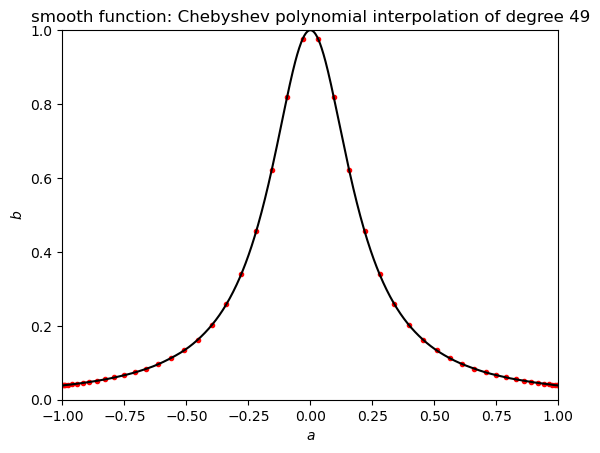

PyObject Text(0.5, 1.0, 'smooth function: Chebyshev polynomial interpolation of degree 49')

In [26]:
n = 50
a = @. cos(((1:n)-0.5) * pi/n) # = Chebyshev nodes of order n
afine = range(-1,1,length=1000)
b = 1 ./ (1 .+ 25 * a.^2)
plot(a, b, "r.")
A = a .^ (0:n-1)'
x̂ = A \ b
plot(afine, (afine .^ (0:n-1)') * x̂, "k-")
xlabel(L"a")
ylabel(L"b")
xlim(-1,1)
ylim(0,1)
title("smooth function: Chebyshev polynomial interpolation of degree $(n-1)")

(Technically, the way we are implementing the fit above is rather fragile in the presence of rounding errors due to the finite precision of computer arithmetic, but that's because monomials $1,x,x^2,\ldots$ behave badly as a basis at high degrees.  The same high-degree fit is fine if we use a different basis, e.g. [Chebyshev polynomials](https://en.wikipedia.org/wiki/Chebyshev_polynomials) by the [FastChebInterp.jl](https://github.com/stevengj/FastChebInterp.jl) package, or a formula like [barycentric Lagrange interpolation](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf).  The basic thing to remember here is that **high-degree polynomial interpolation/fitting can be fine** but **requires care**.)

How this works goes far outside the bounds of 18.(C)06, but is beautiful and fascinating mathematics.  See, for example, [this book](https://people.maths.ox.ac.uk/trefethen/ATAP/) and [these video lectures](https://people.maths.ox.ac.uk/trefethen/atapvideos.html) by [Nick Trefethen](https://people.maths.ox.ac.uk/trefethen/).

The great thing about fitting complicated functions to polynomials is that polynomials are usually easier to work with — finding roots, derivatives, and integrals of polynomials is easy, for example.   A pioneering software package encapsulating this idea is [chebfun](http://www.chebfun.org/), and a Julia implementation of similar ideas is [ApproxFun](https://github.com/JuliaApproximation/ApproxFun.jl).